In [11]:
%%time

import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(work_path)

from my_helper.regression import *
from my_helper.util import *
from my_helper.plot import *
from my_helper.analysis import *
from yjk_module.preprocessing import *

import pandas as pd
import numpy as np

CPU times: total: 0 ns
Wall time: 2.54 s


In [2]:
df = pd.read_excel("./data/us_health_insurance.xlsx")

In [3]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [4]:
X = df.copy()
Y = X.pop('charges')

In [6]:
pp = YjkPreprocessor()

In [7]:
pp.set_strategy(outline = None)

아래와 같이 처리합니다.
+-------------+---------------+
| 범주        | 처리방법      |
|-------------+---------------|
| 이상치 처리 | 처리하지 않음 |
| 결측치 처리 | 중앙값 대체   |
| 스케일러    | 표준화        |
| 인코딩      | 원핫인코딩    |
+-------------+---------------+


In [8]:
X_p = pp.fit_transform(X)

데이터프레임 크기 : (1338, 6)
데이터프레임에 결측치는 없습니다.
연속형 데이터 컬럼 : ['age', 'bmi', 'children'], 총 3개
명목형 데이터 컬럼 : ['sex', 'smoker', 'region'], 총 3개


In [9]:
X_p.head()

age       bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0 -1.438764 -0.453320 -0.908614         1.0       0.0        0.0         1.0   
1 -1.509965  0.509621 -0.078767         0.0       1.0        1.0         0.0   
2 -0.797954  0.383307  1.580926         0.0       1.0        1.0         0.0   
3 -0.441948 -1.305531 -0.908614         0.0       1.0        1.0         0.0   
4 -0.513149 -0.292556 -0.908614         0.0       1.0        1.0         0.0   

   region_northeast  region_northwest  region_southeast  region_southwest  
0               0.0               0.0               0.0               1.0  
1               0.0               0.0               1.0               0.0  
2               0.0               0.0               1.0               0.0  
3               0.0               1.0               0.0               0.0  
4               0.0               1.0               0.0               0.0

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X_p, Y, test_size = 0.25, random_state = 0)

In [12]:
lr = LinearRegression(n_jobs = -1)
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [13]:
lr.score(x_test, y_test)

0.7961633432413542

In [14]:
mean_absolute_error(y_test, lr.predict(x_test))

3956.828690743284

[교차검증]
+----+-------------------+
|    |   mean_test_score |
|----+-------------------|
|  0 |          0.722017 |
+----+-------------------+

[회귀식]
charges = 3525.586 * age + 2084.900 * bmi + 506.057 * children + -240848649940673792.000 * sex_female + -240848649940673792.000 * sex_male + 739852449694239104.000 * smoker_no + 739852449694263552.000 * smoker_yes + 56810076478982384.000 * region_northeast + 56810076478982144.000 * region_northwest + 56810076478980960.000 * region_southeast + 56810076478981344.000 * region_southwest + -555813876232538752.000

[회귀분석 성능평가]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 데이터 |       0

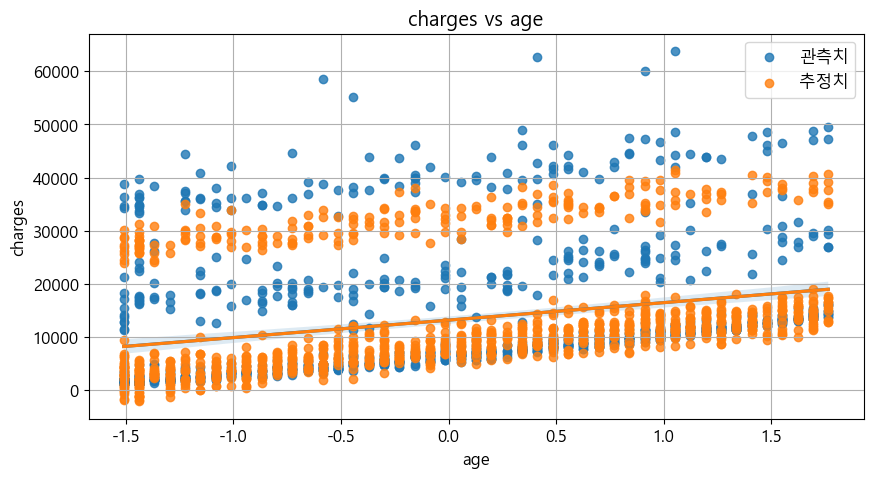

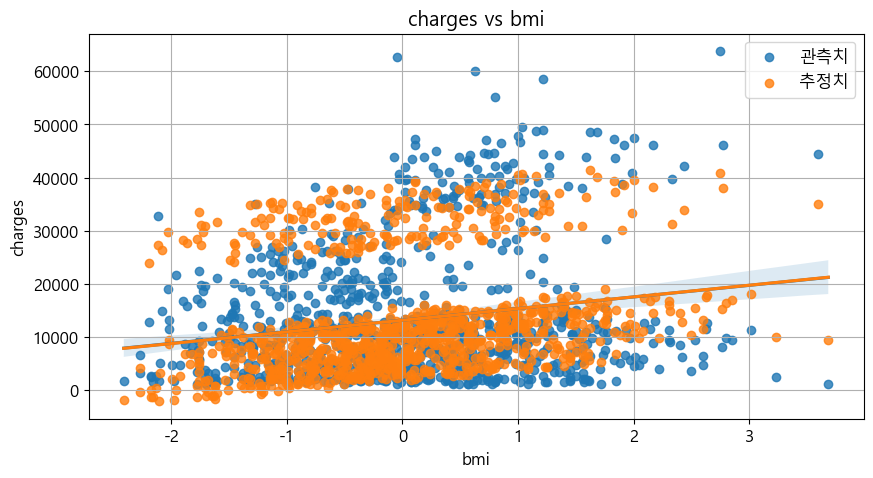

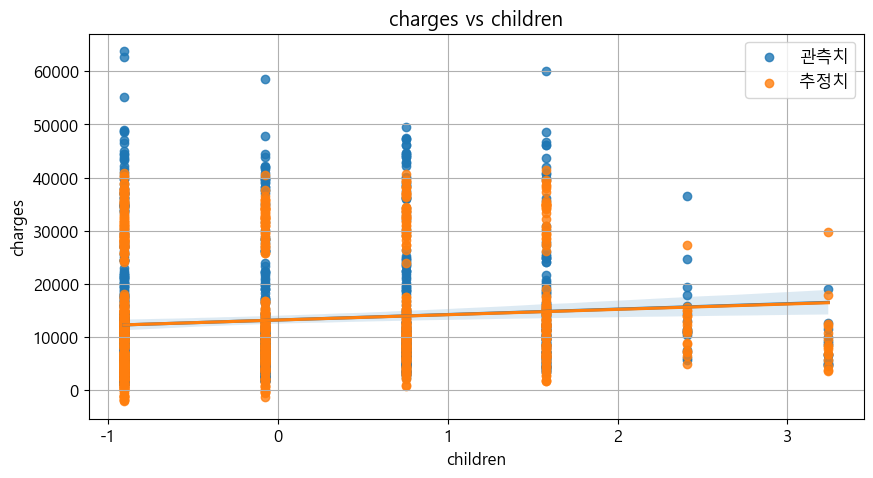

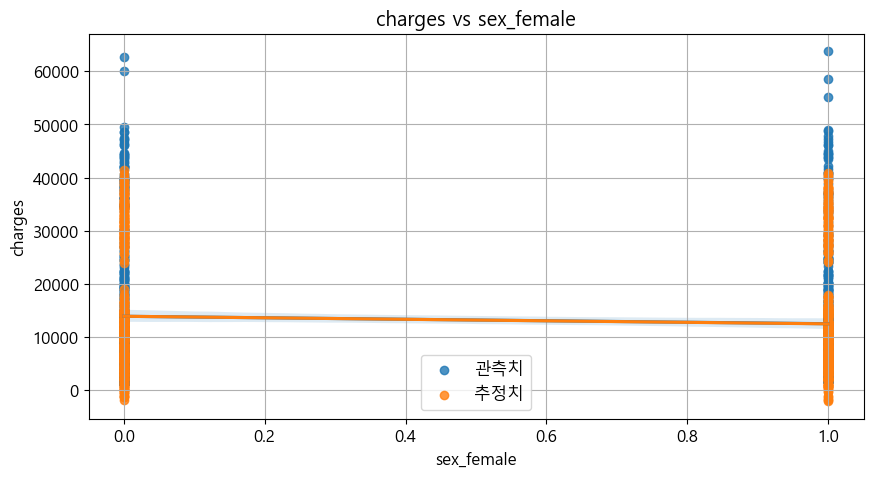

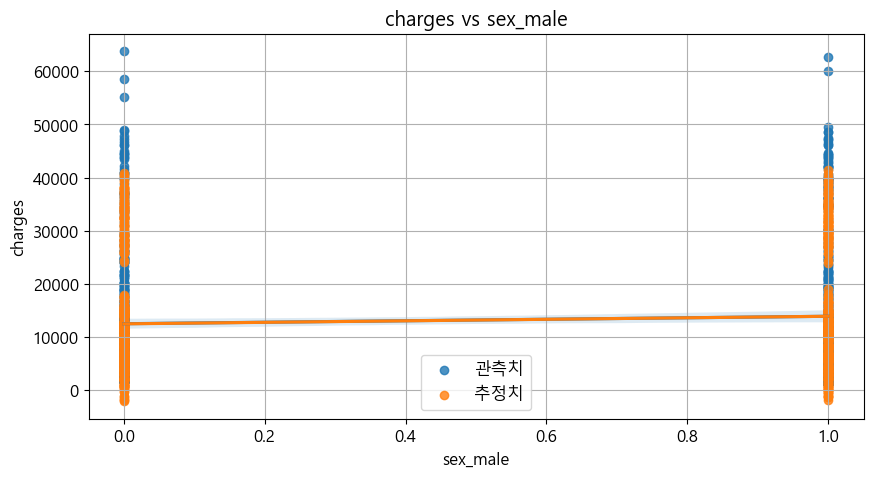

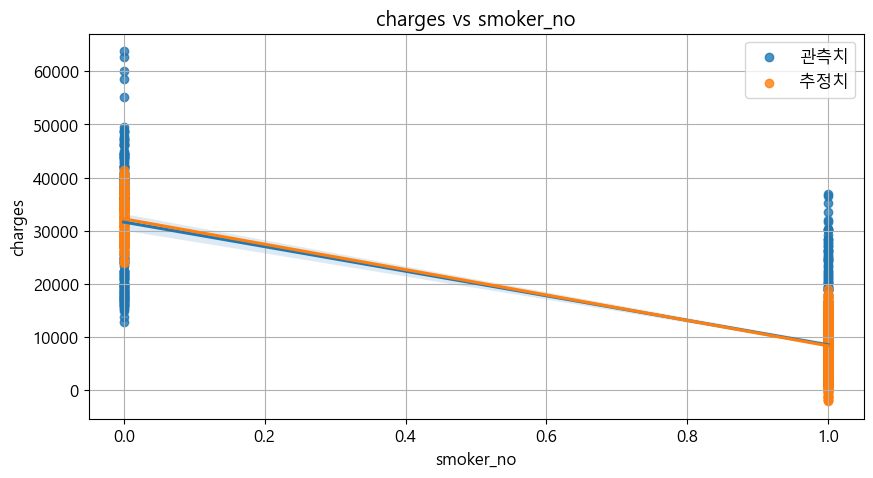

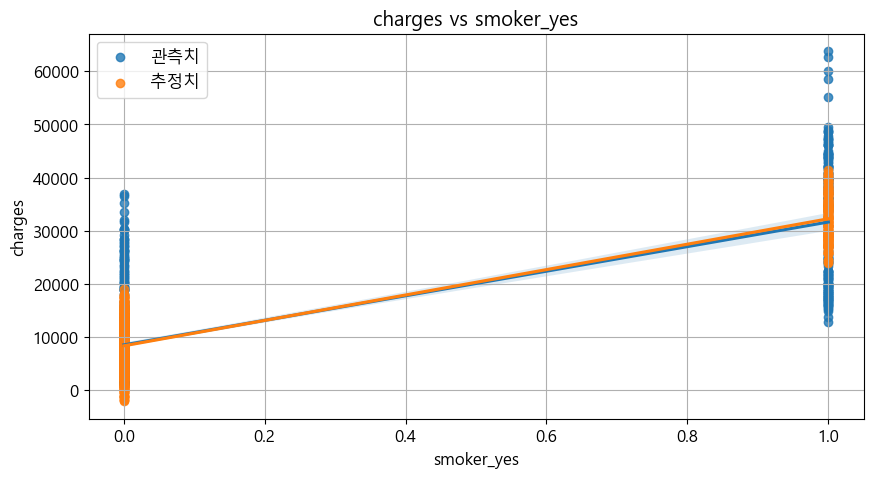

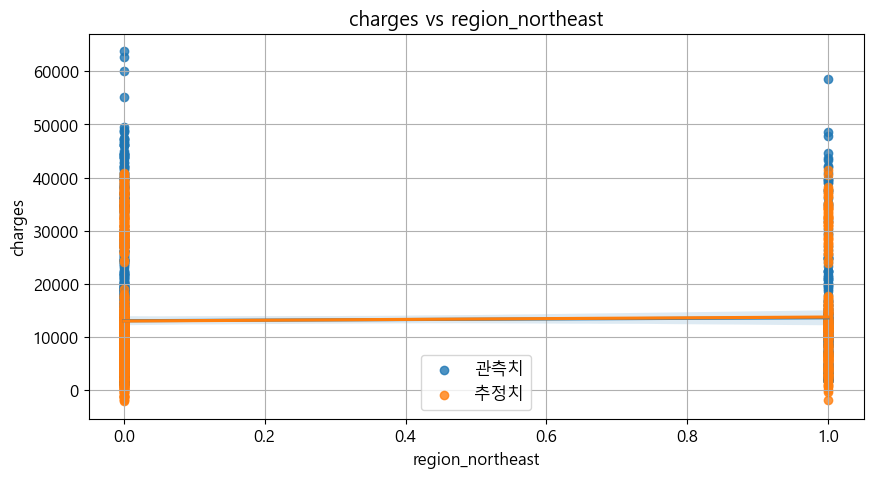

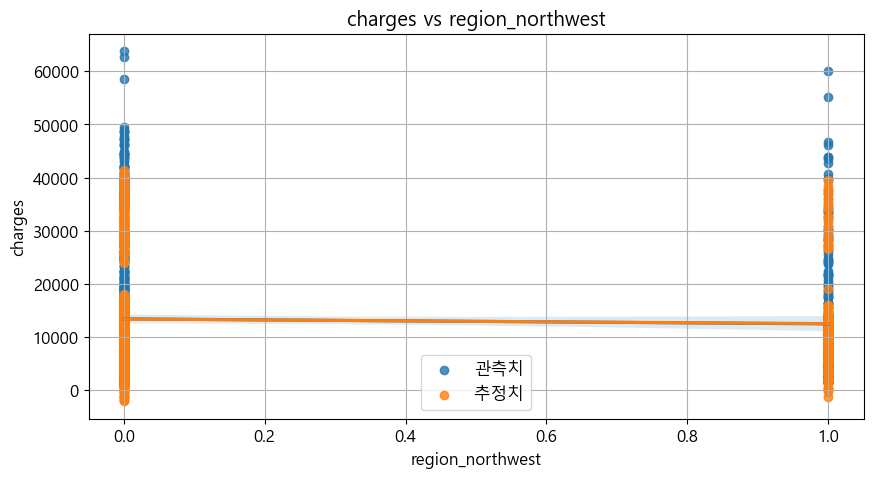

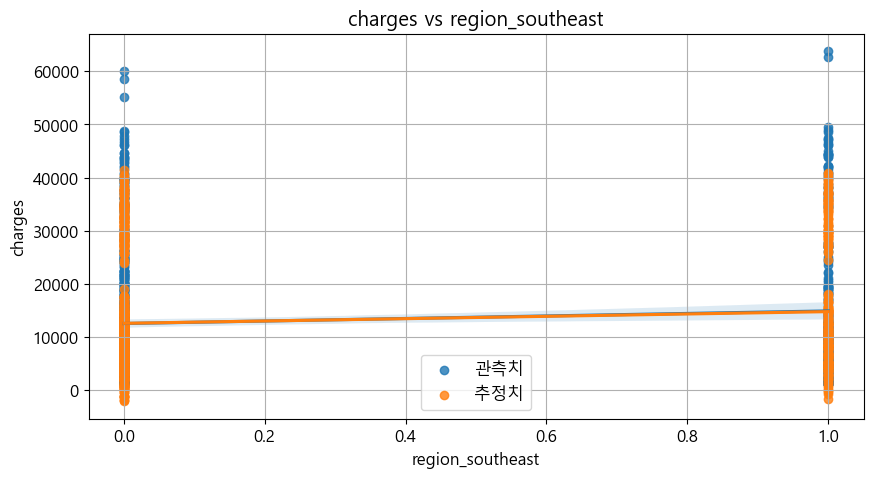

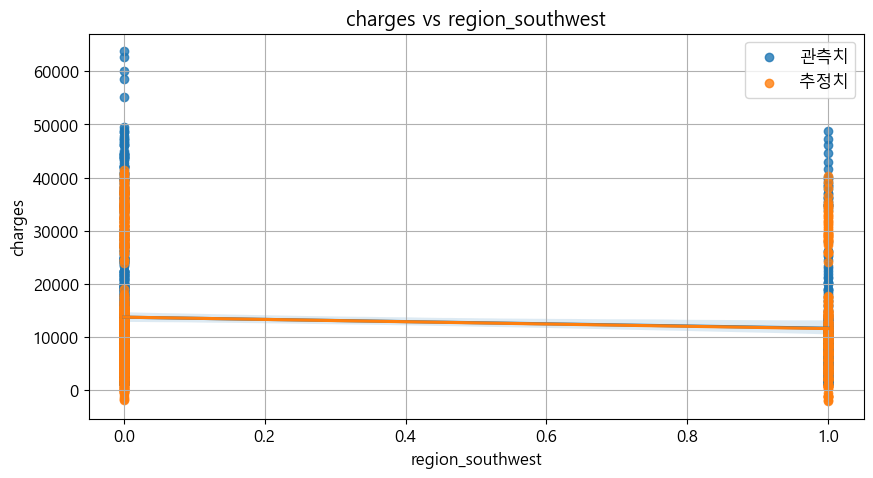

LinearRegression(n_jobs=-1)

In [15]:
my_linear_regression(x_train, y_train, cv = 5, degree = 1, dpi = 100)

In [16]:
X2 = X.copy()

In [17]:
X2['age_c'] = X2['age'].apply(lambda x : int(x/10))
X2['bmi_c'] = X2['bmi'].apply(lambda x : 1 if x > 30 else 0)

In [18]:
X2['age_c'] = X2['age_c'].astype('category')
X2['bmi_c'] = X2['bmi_c'].astype('category')

In [19]:
pp2 = YjkPreprocessor()

In [20]:
pp2.set_strategy(outline = None)

아래와 같이 처리합니다.
+-------------+---------------+
| 범주        | 처리방법      |
|-------------+---------------|
| 이상치 처리 | 처리하지 않음 |
| 결측치 처리 | 중앙값 대체   |
| 스케일러    | 표준화        |
| 인코딩      | 원핫인코딩    |
+-------------+---------------+


In [21]:
X2_p = pp2.fit_transform(X2)

데이터프레임 크기 : (1338, 8)
데이터프레임에 결측치는 없습니다.
연속형 데이터 컬럼 : ['age', 'bmi', 'children'], 총 3개
명목형 데이터 컬럼 : ['sex', 'smoker', 'region', 'age_c', 'bmi_c'], 총 5개


In [22]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X2_p, Y, test_size = 0.25, random_state = 0)

In [23]:
lr = LinearRegression()
lr.fit(x_train_2, y_train_2)

LinearRegression()

In [24]:
lr.score(x_test_2, y_test_2)

0.8046436697870888

[회귀식]
charges = 3550.077 * age + 905.485 * bmi + 702.408 * children + -182867595225660096.000 * sex_female + -182867595225660160.000 * sex_male + 788927454719313408.000 * smoker_no + 788927454719338368.000 * smoker_yes + 126360014226765312.000 * region_northeast + 126360014226765088.000 * region_northwest + 126360014226764208.000 * region_southeast + 126360014226764320.000 * region_southwest + -2295008910843221.500 * age_c_1 + -2295008910842973.000 * age_c_2 + -2295008910844387.500 * age_c_3 + -2295008910844315.000 * age_c_4 + -2295008910843218.500 * age_c_5 + -2295008910843128.500 * age_c_6 + -72926726135341248.000 * bmi_c_0 + -72926726135338352.000 * bmi_c_1 + -657198138674226432.000

[회귀분석 성능평가]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|--------+----------------+---

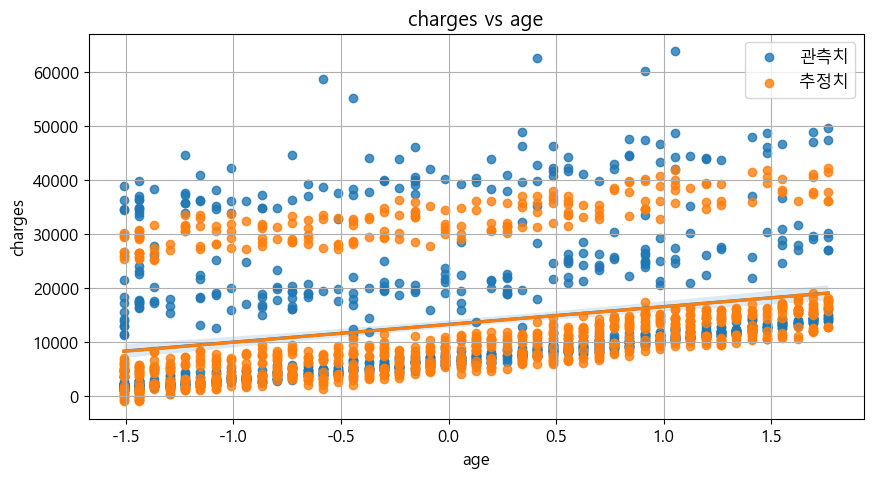

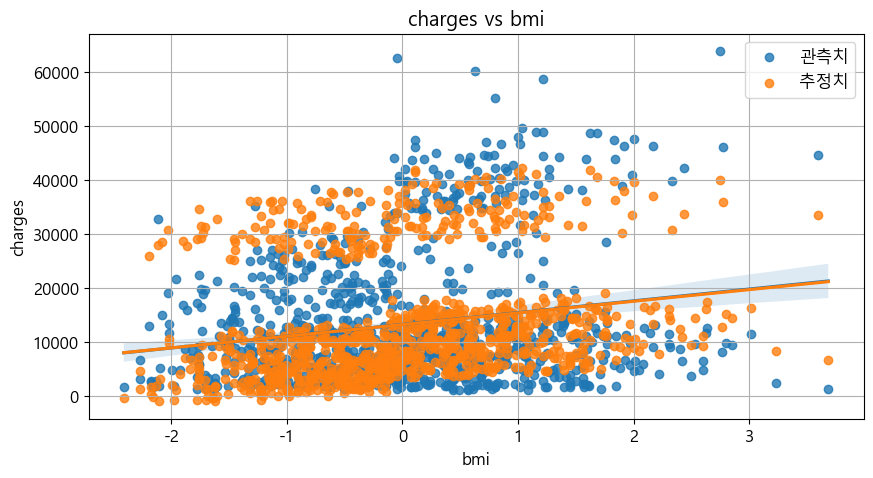

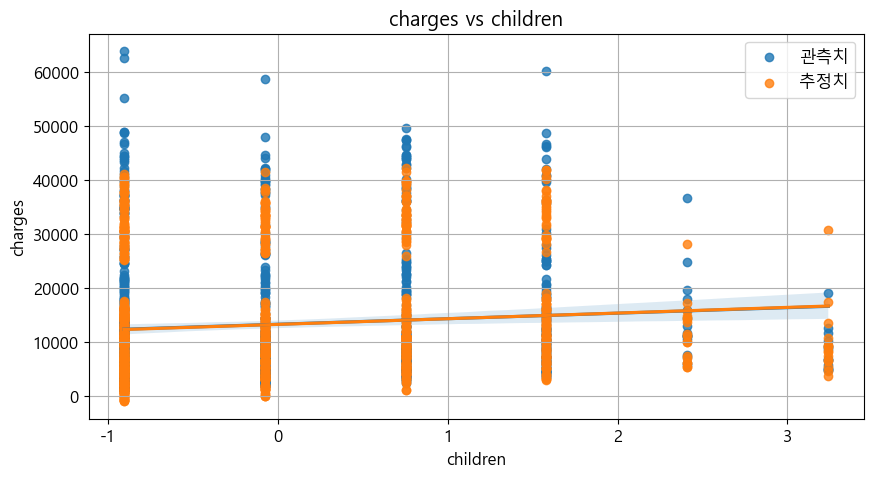

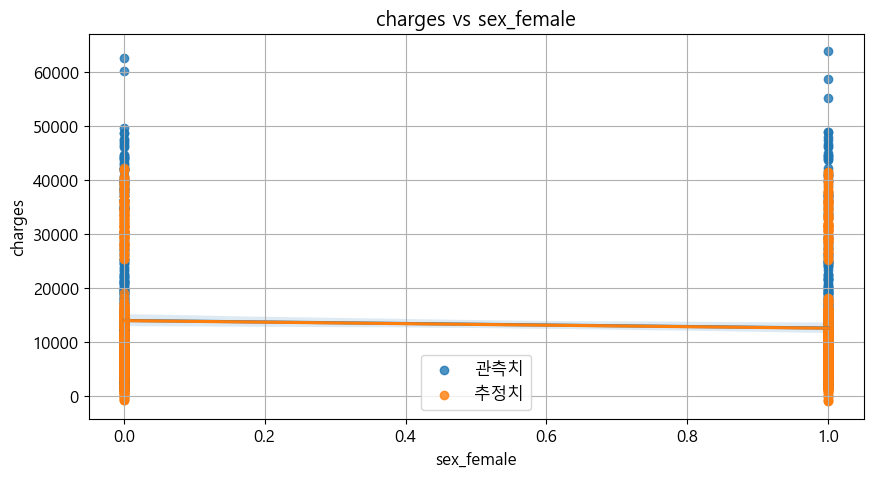

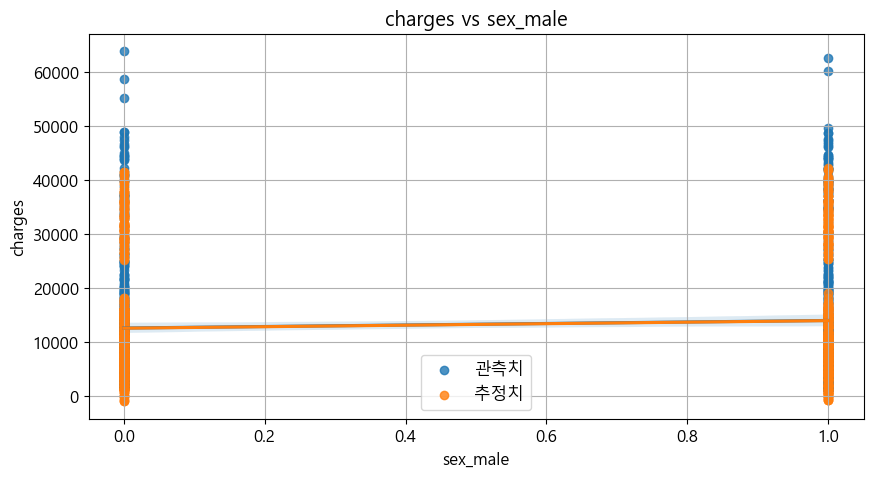

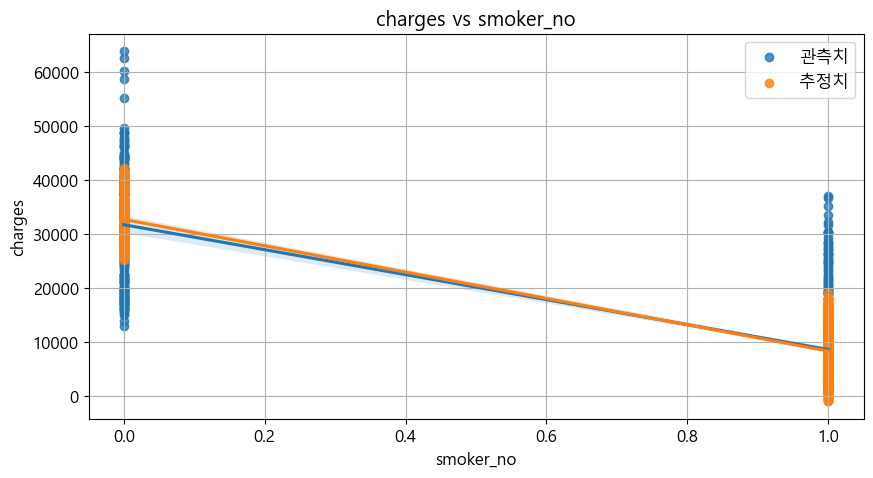

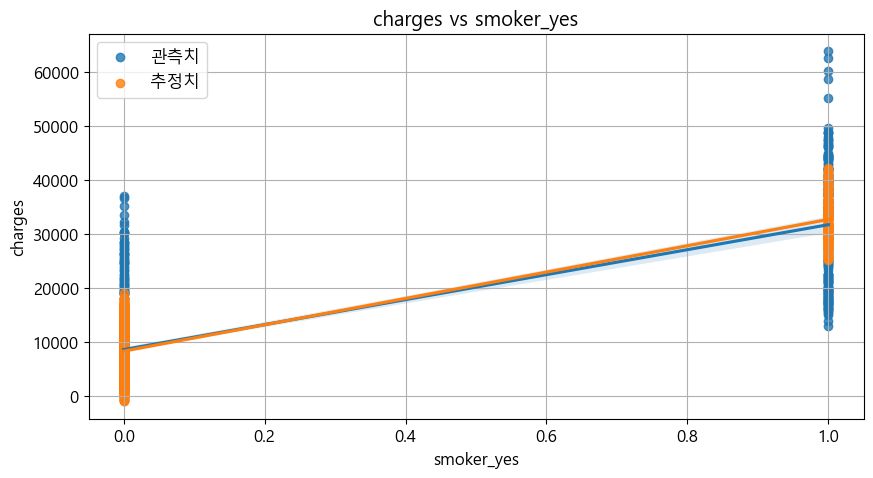

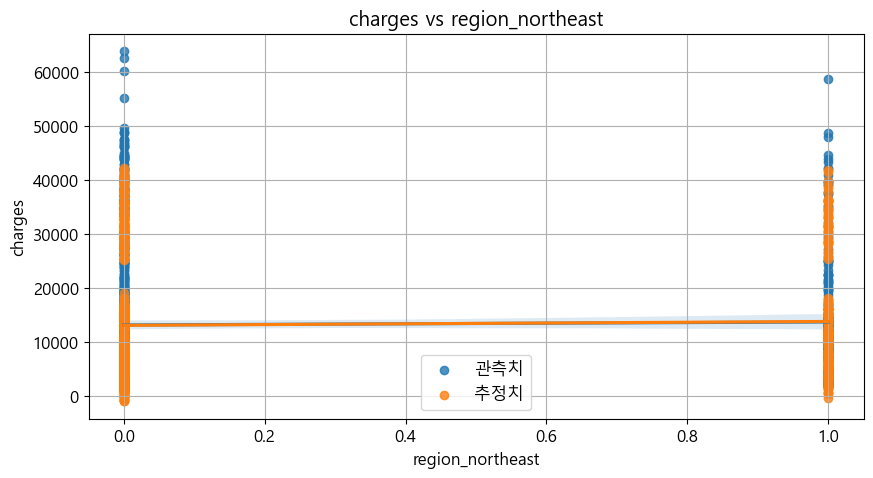

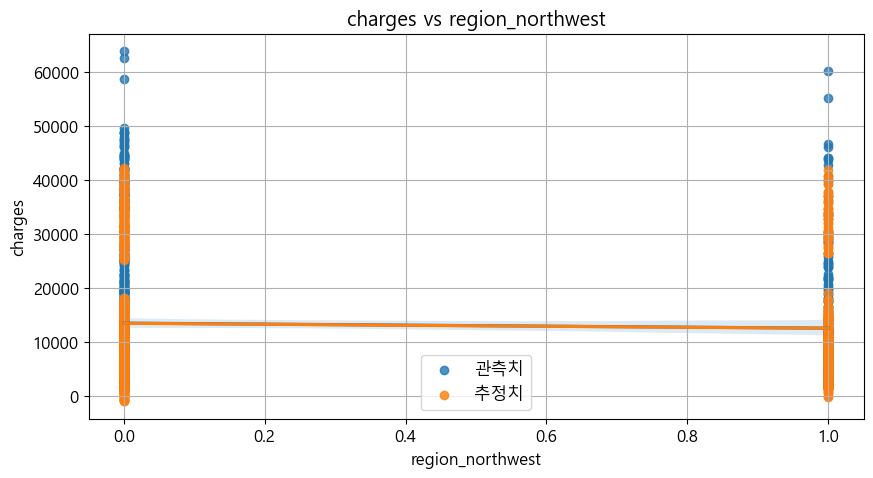

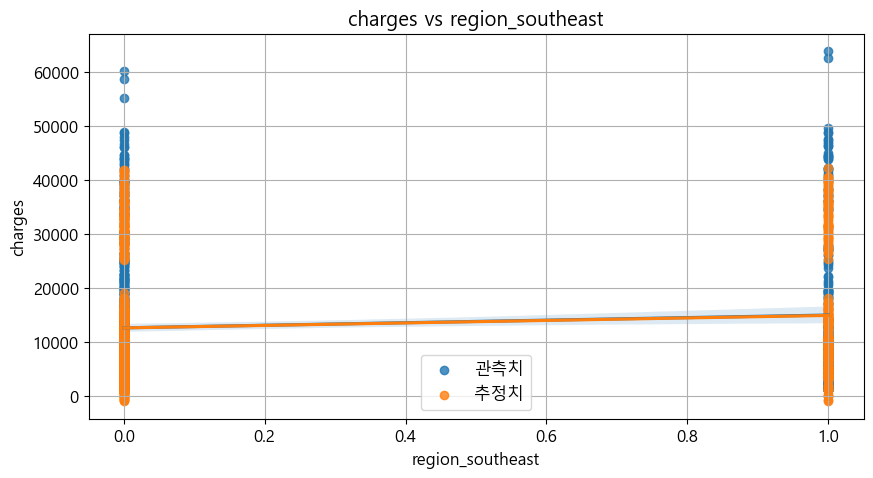

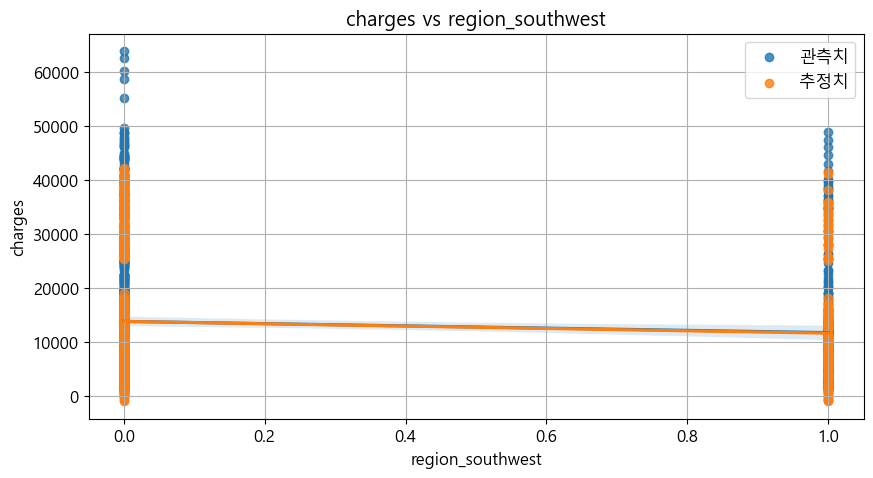

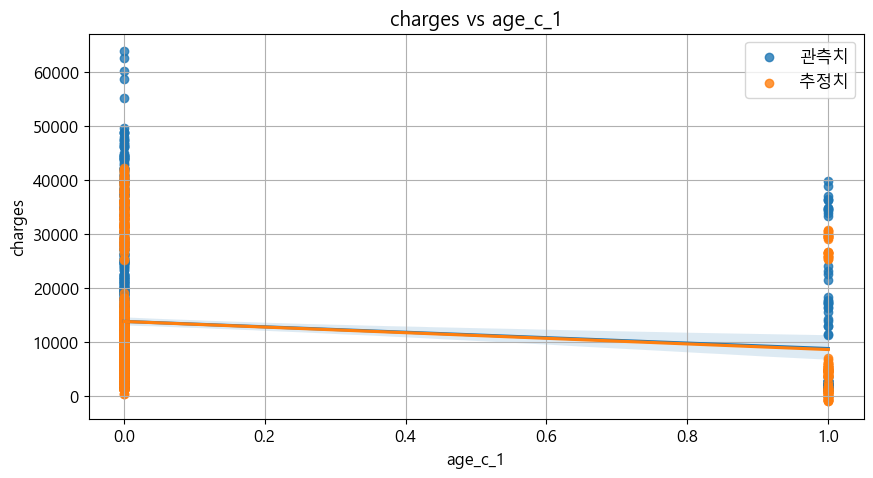

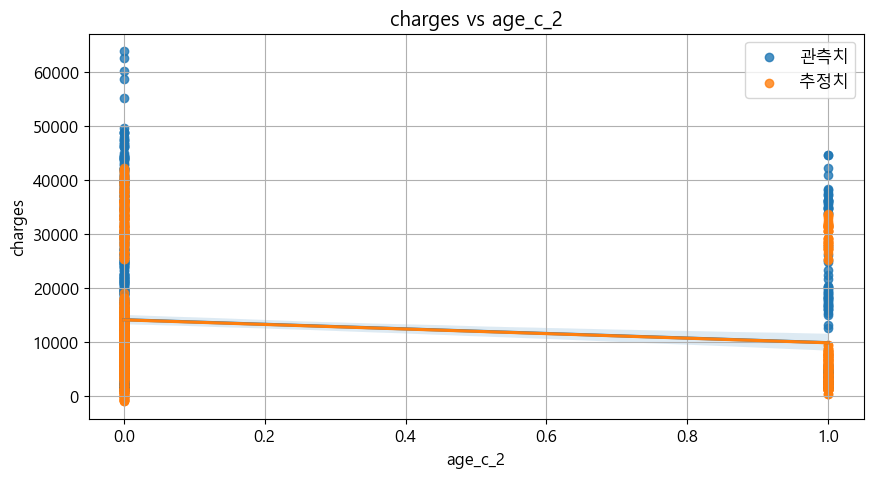

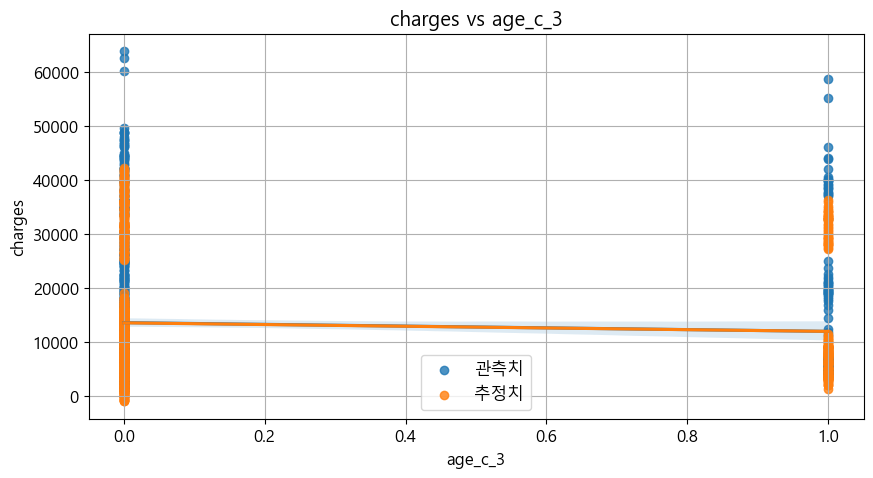

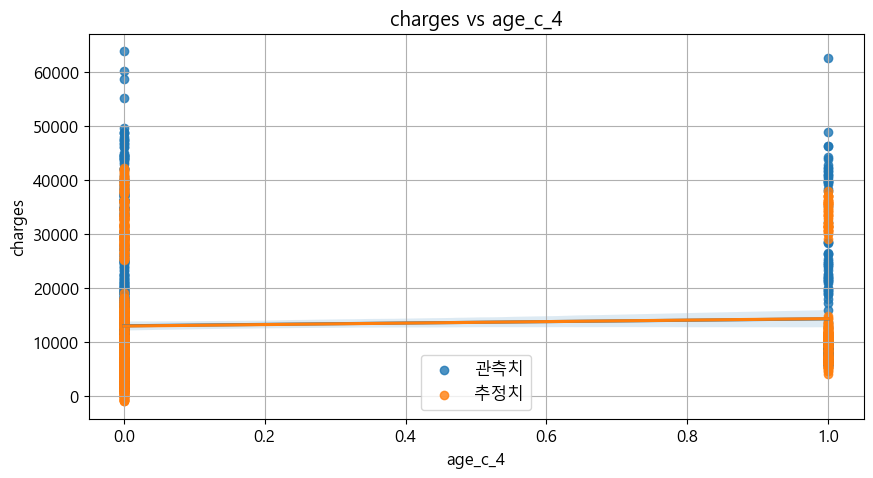

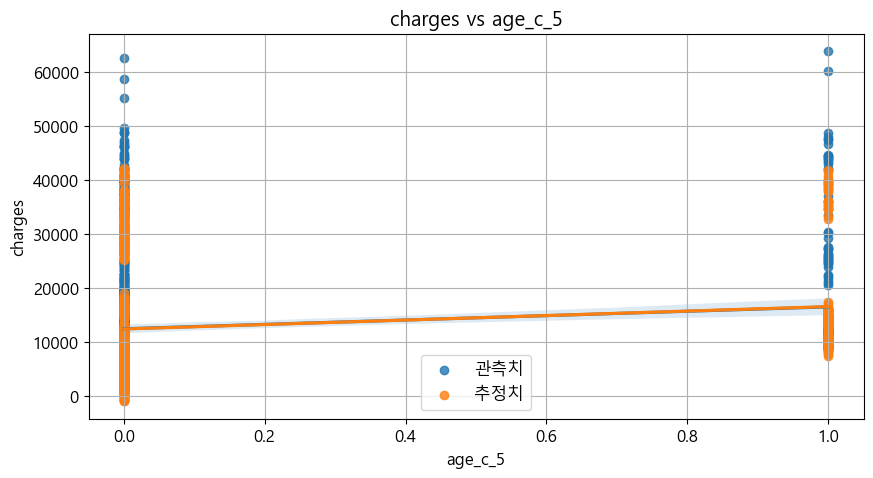

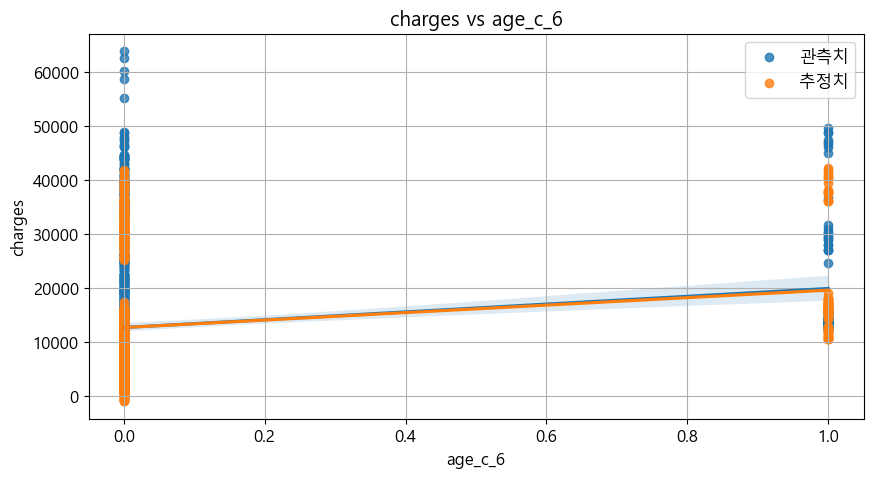

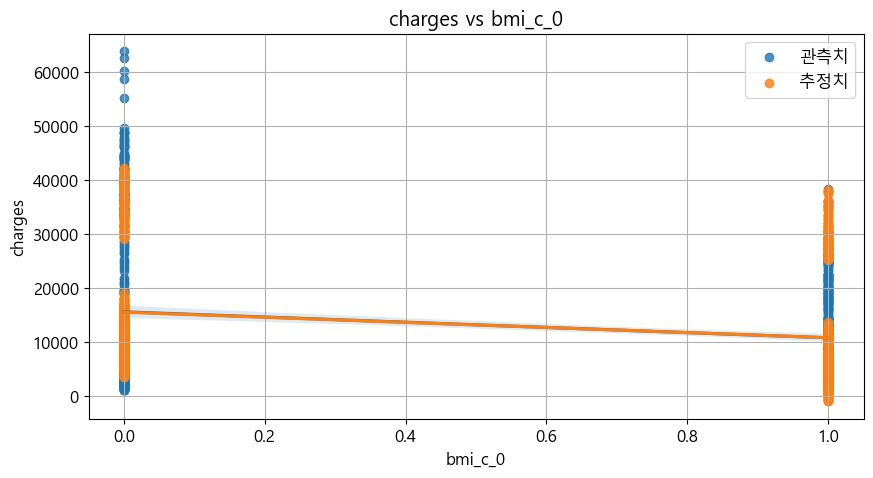

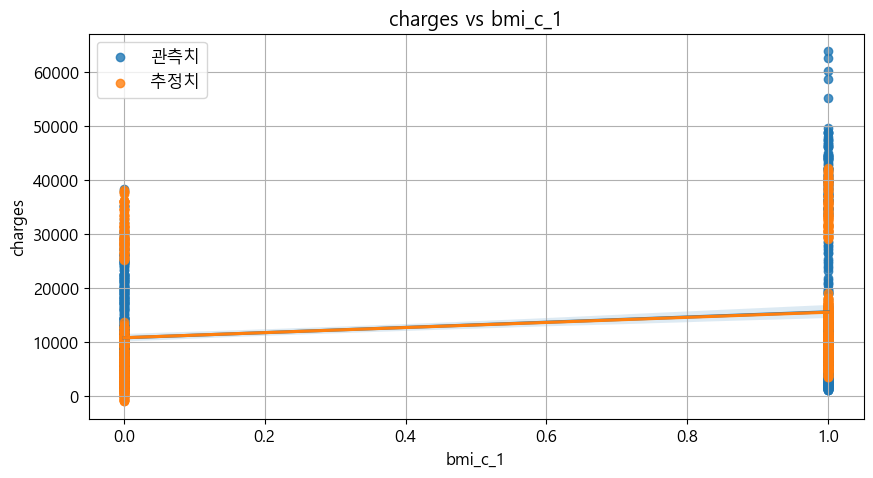

LinearRegression(n_jobs=-1)

In [25]:
my_linear_regression(x_train_2, y_train_2, degree = 1, dpi = 100)

In [26]:
X3 = X2.copy()
X3.head()

age     sex     bmi  children smoker     region age_c bmi_c
0   19  female  27.900         0    yes  southwest     1     0
1   18    male  33.770         1     no  southeast     1     1
2   28    male  33.000         3     no  southeast     2     1
3   33    male  22.705         0     no  northwest     3     0
4   32    male  28.880         0     no  northwest     3     0

In [27]:
X3['smoker_region'] = X3['smoker'] + "_" + X3['region']

In [28]:
X3.drop(['smoker', 'region'], axis = 1, inplace = True)

In [29]:
pp3 = YjkPreprocessor()

In [48]:
pp3.set_strategy(outline = None, null = 'median', scaler = 's', encoder = 'o')

이미 Fit된 데이터가 있습니다. 객체에 데이터를 다시 입력하세요
아래와 같이 처리합니다.
+-------------+---------------+
| 범주        | 처리방법      |
|-------------+---------------|
| 이상치 처리 | 처리하지 않음 |
| 결측치 처리 | 중앙값 대체   |
| 스케일러    | 표준화        |
| 인코딩      | 원핫인코딩    |
+-------------+---------------+


In [49]:
X3_p = pp3.fit_transform(X3)

데이터프레임 크기 : (1338, 7)
데이터프레임에 결측치는 없습니다.
연속형 데이터 컬럼 : ['age', 'bmi', 'children'], 총 3개
명목형 데이터 컬럼 : ['sex', 'age_c', 'bmi_c', 'smoker_region'], 총 4개


In [50]:
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(X3_p, Y, test_size = 0.25, random_state = 0)

In [51]:
lr = LinearRegression()
lr.fit(x_train_3, y_train_3)

LinearRegression()

In [52]:
lr.score(x_test_3, y_test_3)

0.8049794720045564

[회귀식]
charges = 3558.759 * age + 703.541 * bmi + 706.156 * children + 32.893 * sex_female + -32.893 * sex_male + 579.045 * age_c_1 + 416.920 * age_c_2 + -736.900 * age_c_3 + -829.003 * age_c_4 + 155.599 * age_c_5 + 414.339 * age_c_6 + -1611.596 * bmi_c_0 + 1611.596 * bmi_c_1 + -10563.478 * smoker_region_no_northeast + -10955.842 * smoker_region_no_northwest + -12919.602 * smoker_region_no_southeast + -12180.820 * smoker_region_no_southwest + 10119.252 * smoker_region_yes_northeast + 10271.657 * smoker_region_yes_northwest + 14142.855 * smoker_region_yes_southeast + 12085.978 * smoker_region_yes_southwest + 20179.320

[회귀분석 성능평가]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|--------+----------------+---------------------+---------------------+------------------+-----------

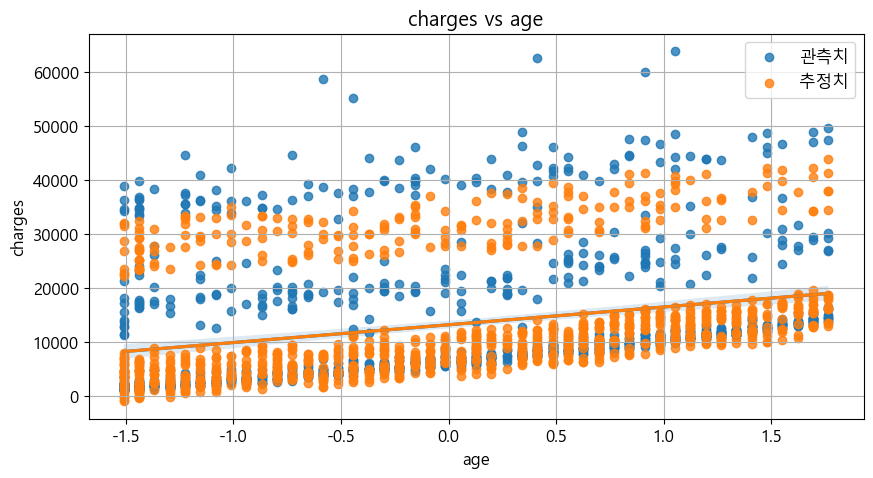

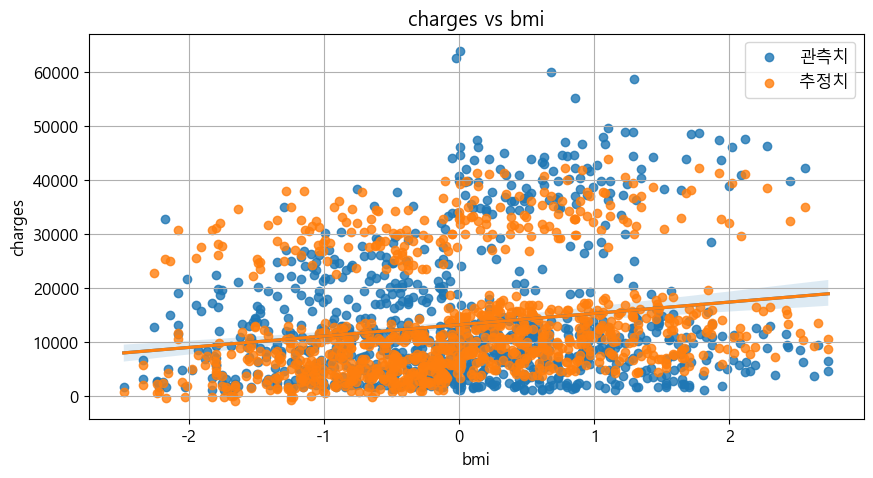

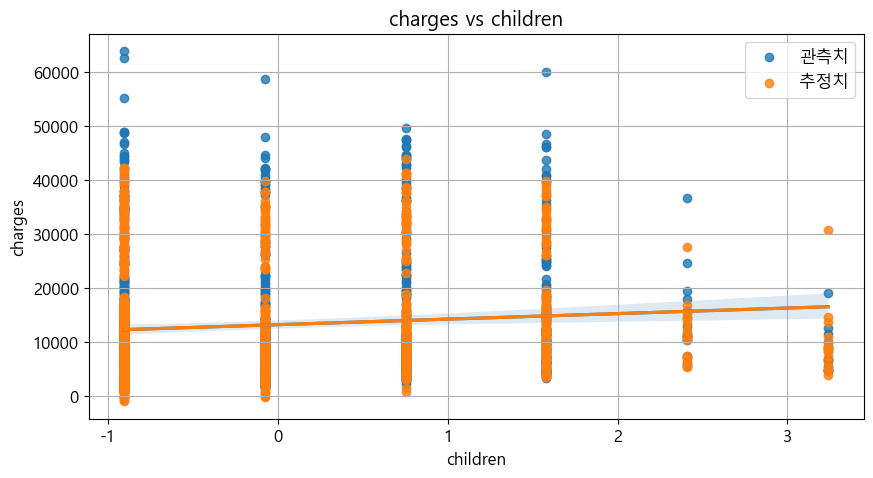

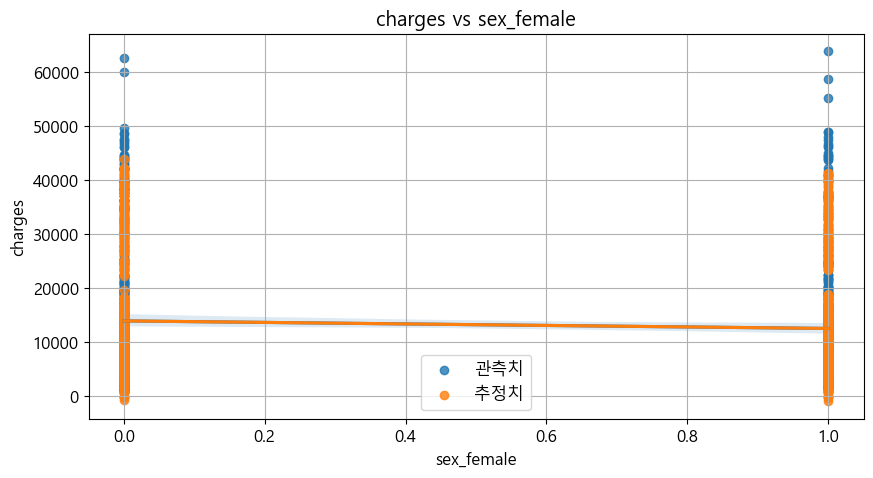

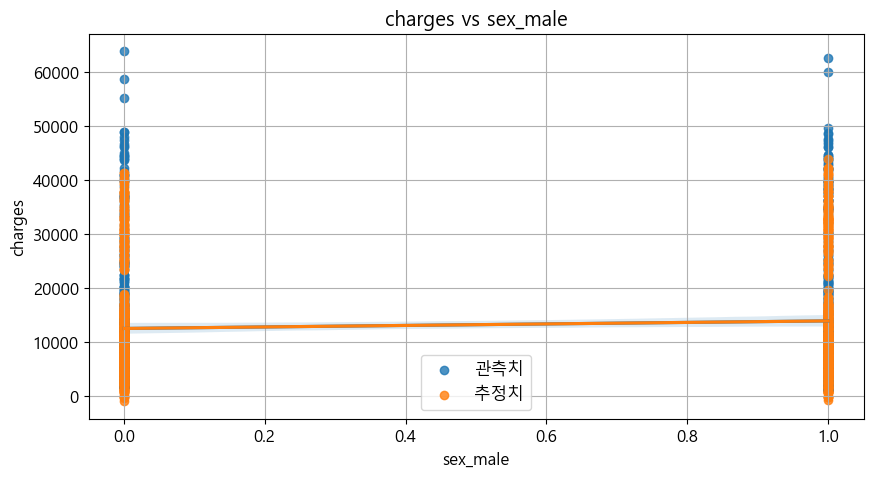

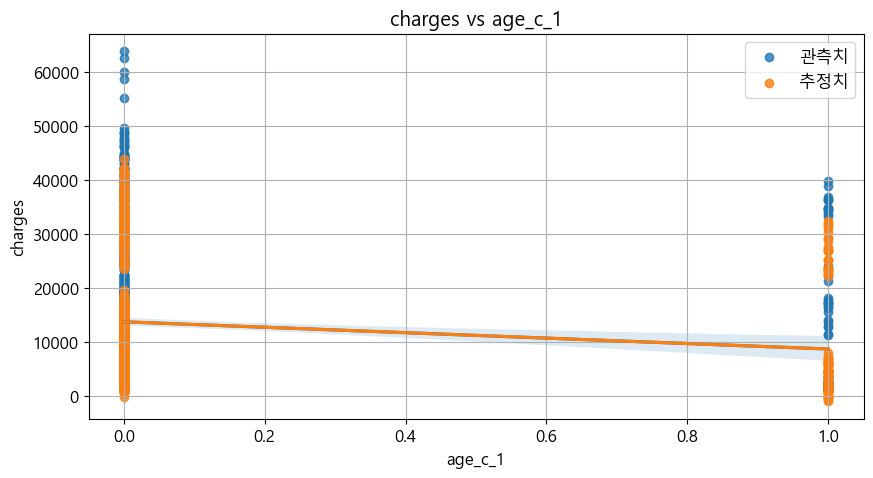

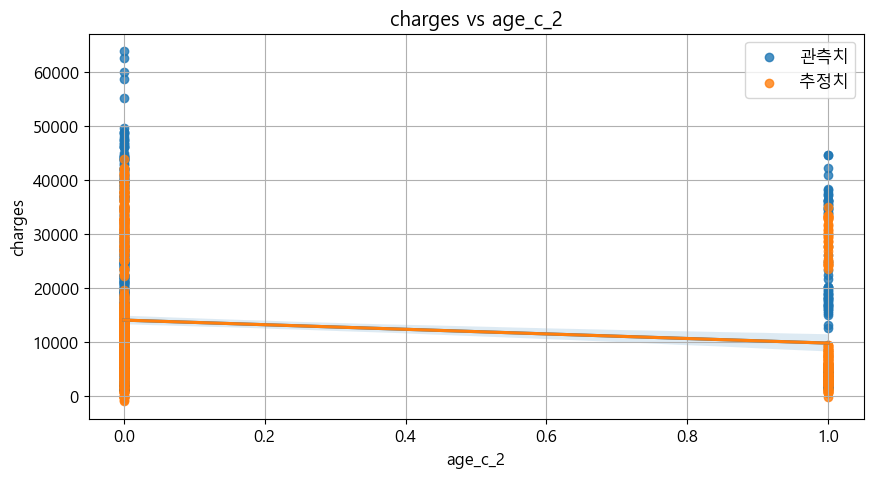

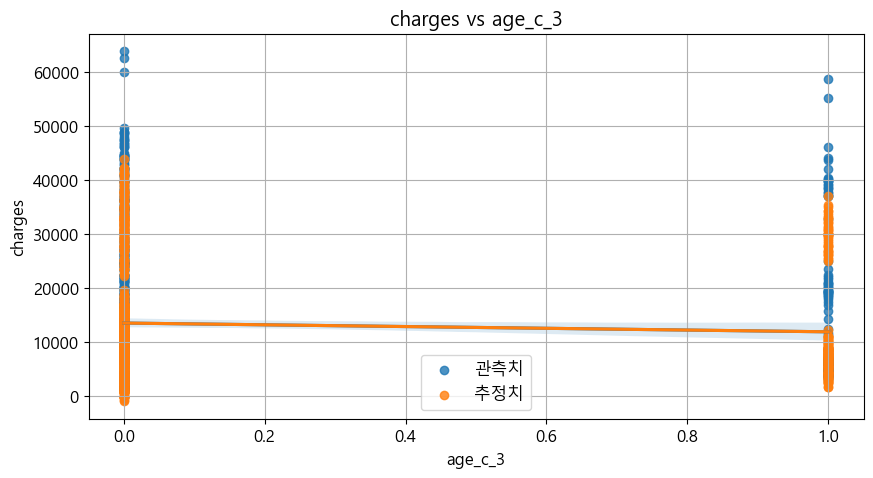

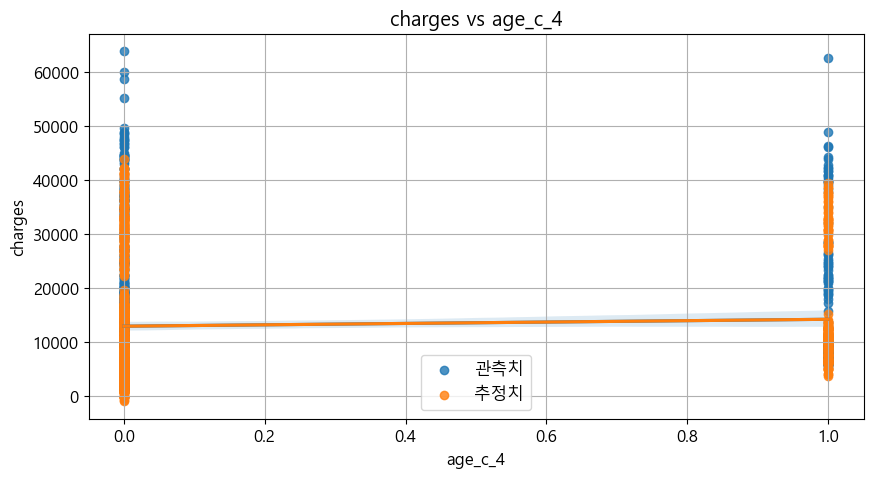

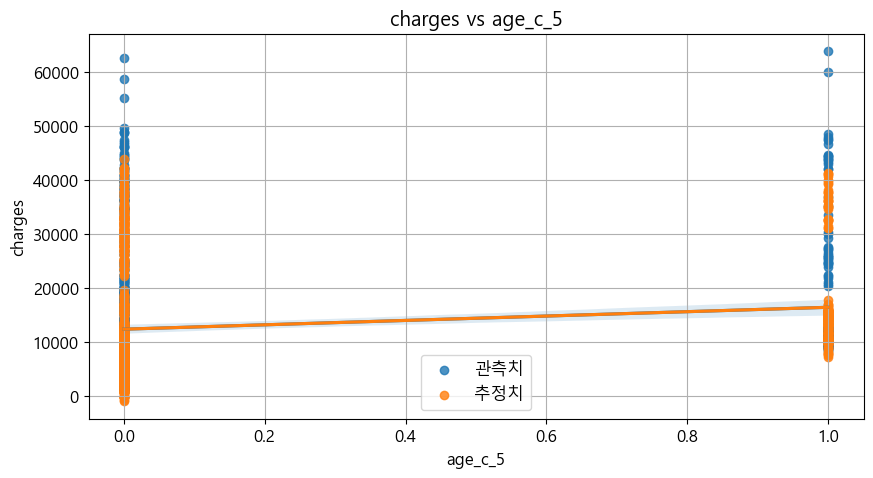

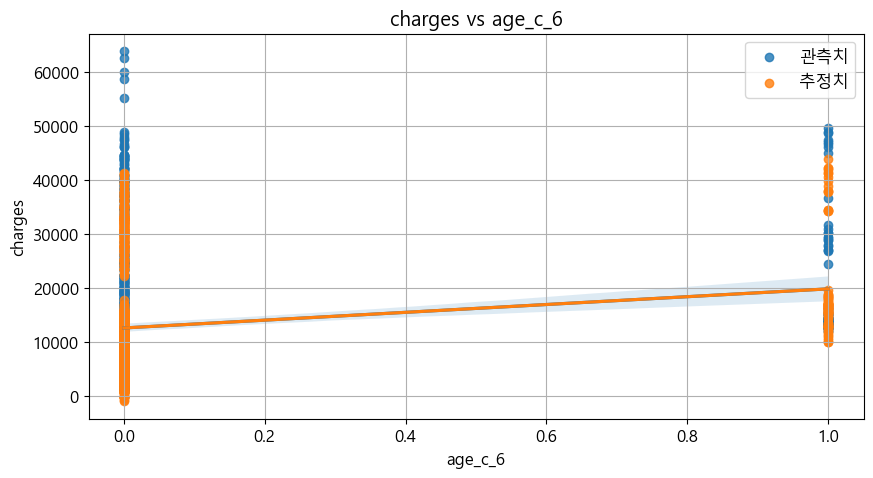

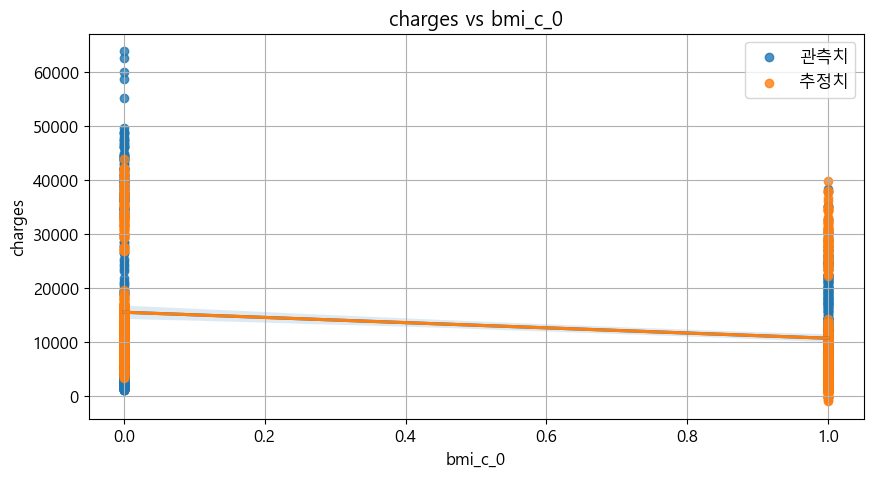

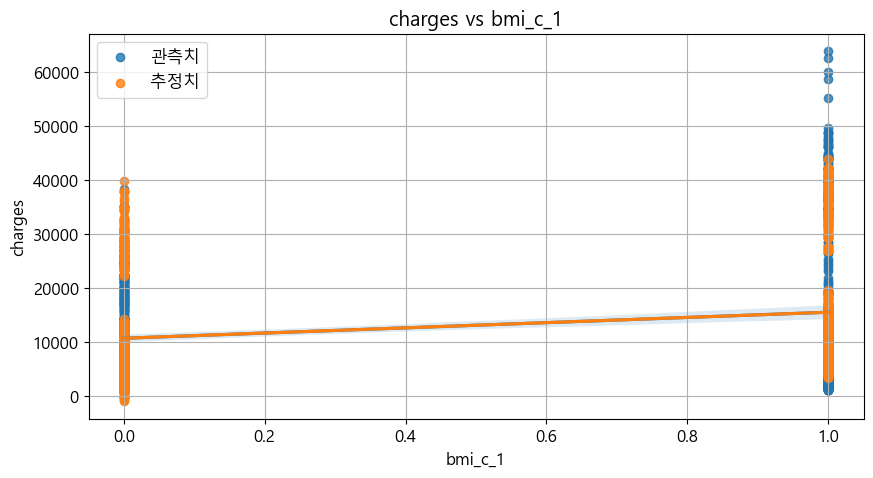

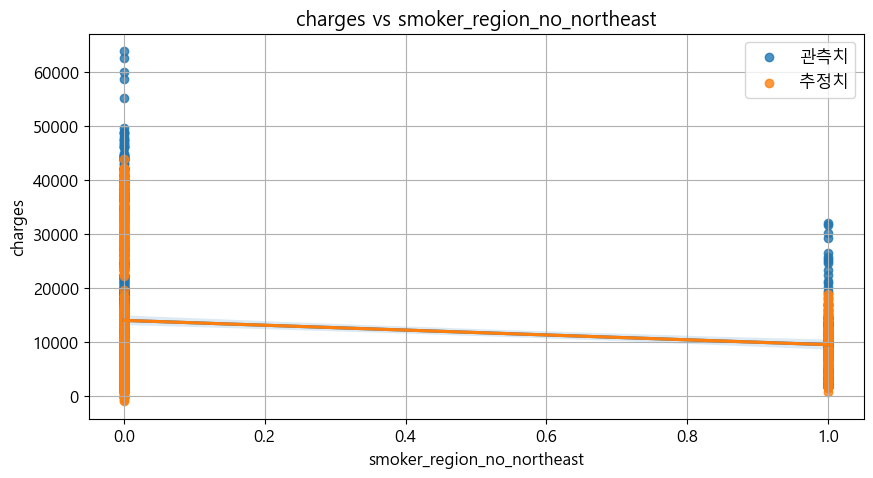

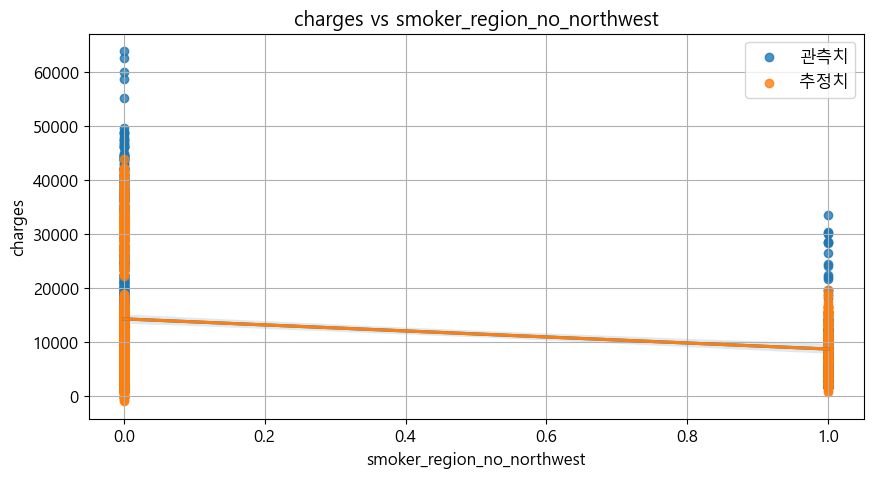

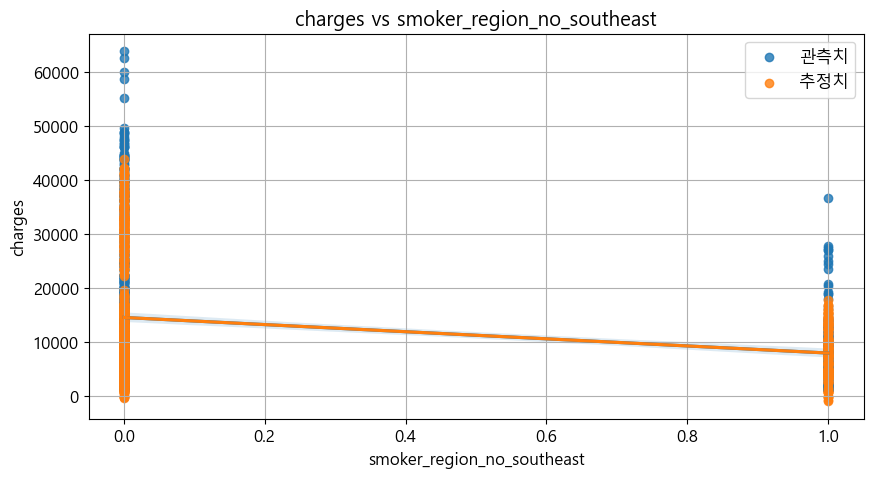

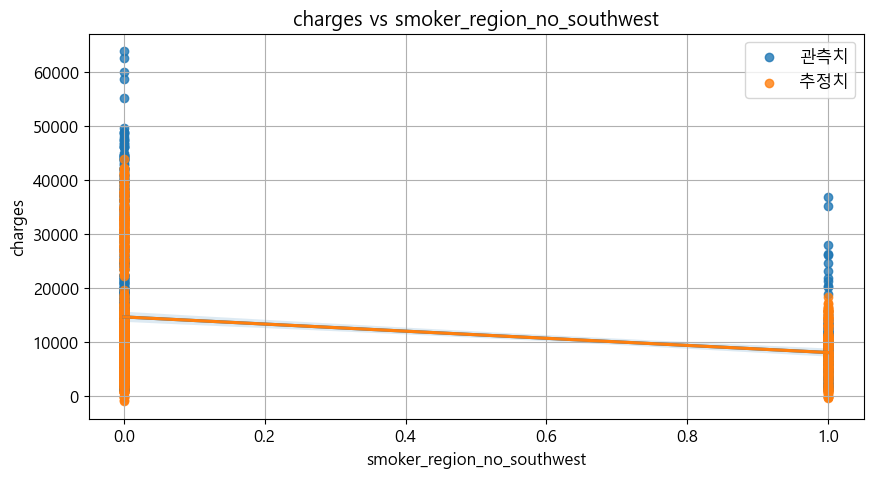

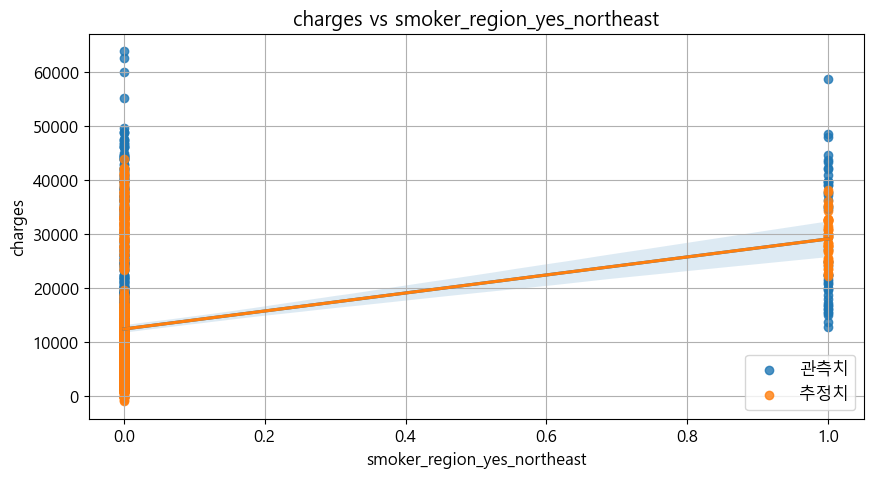

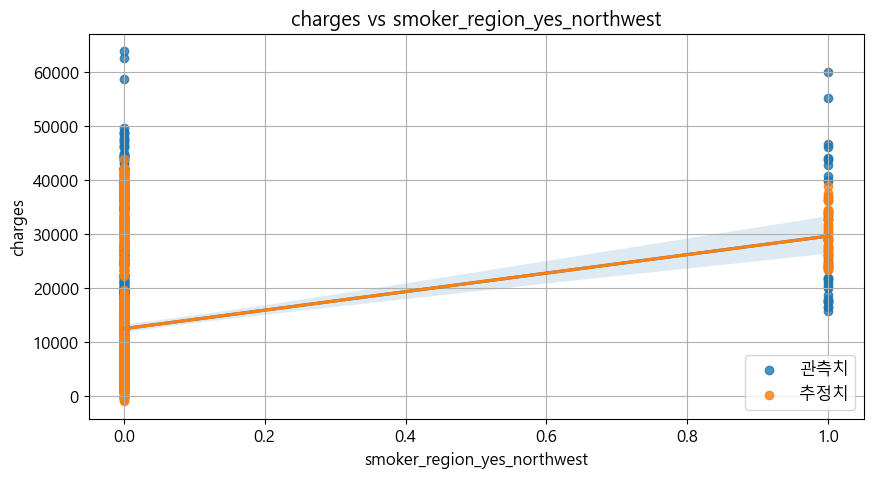

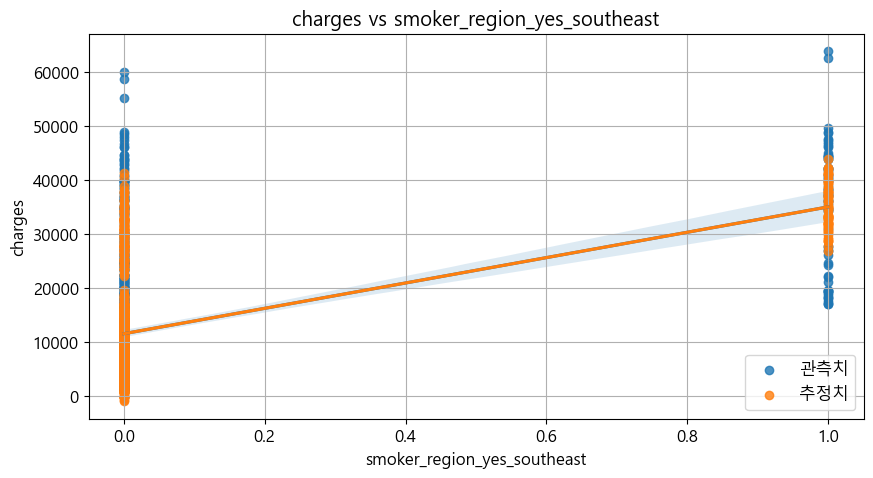

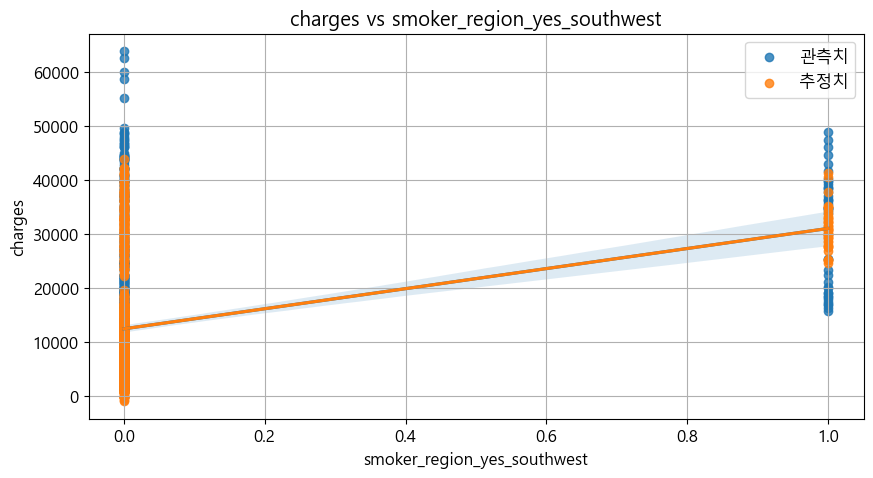

LinearRegression(n_jobs=-1)

In [56]:
my_linear_regression(x_train_3, y_train_3, degree = 2, dpi = 100)

In [60]:
X4 = X3.copy()

In [61]:
X4['age^2'] = X4['age'] ** 2

In [62]:
pp4 = YjkPreprocessor()

In [63]:
pp4.set_strategy(outline = None)

아래와 같이 처리합니다.
+-------------+---------------+
| 범주        | 처리방법      |
|-------------+---------------|
| 이상치 처리 | 처리하지 않음 |
| 결측치 처리 | 중앙값 대체   |
| 스케일러    | 표준화        |
| 인코딩      | 원핫인코딩    |
+-------------+---------------+


In [64]:
X4_p = pp4.fit_transform(X4)

데이터프레임 크기 : (1338, 8)
데이터프레임에 결측치는 없습니다.
연속형 데이터 컬럼 : ['age', 'bmi', 'children', 'age^2'], 총 4개
명목형 데이터 컬럼 : ['sex', 'age_c', 'bmi_c', 'smoker_region'], 총 4개


In [65]:
x_train_4, x_test_4, y_train_4, y_test_4 = train_test_split(X4_p, Y, test_size = 0.25, random_state = 0)

[회귀식]
charges = 6424.747 * age + 700.862 * bmi + 690.647 * children + -2882.776 * age^2 + 30.434 * sex_female + -30.434 * sex_male + 1099.059 * age_c_1 + 413.118 * age_c_2 + -1271.043 * age_c_3 + -1377.240 * age_c_4 + 84.678 * age_c_5 + 1051.427 * age_c_6 + -1613.583 * bmi_c_0 + 1613.583 * bmi_c_1 + -10551.384 * smoker_region_no_northeast + -10956.052 * smoker_region_no_northwest + -12904.155 * smoker_region_no_southeast + -12186.546 * smoker_region_no_southwest + 10094.213 * smoker_region_yes_northeast + 10285.469 * smoker_region_yes_northwest + 14130.103 * smoker_region_yes_southeast + 12088.350 * smoker_region_yes_southwest + 20302.629

[회귀분석 성능평가]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|--------+----------------+---------------------+---------------------+-------

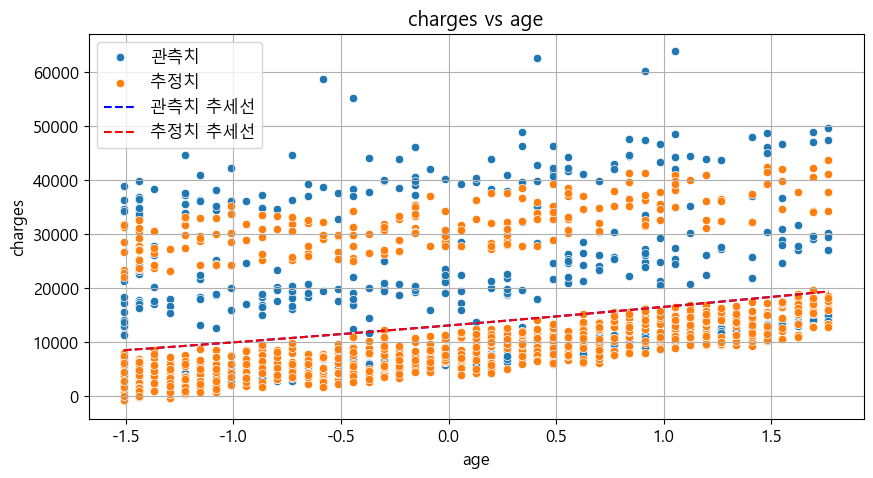

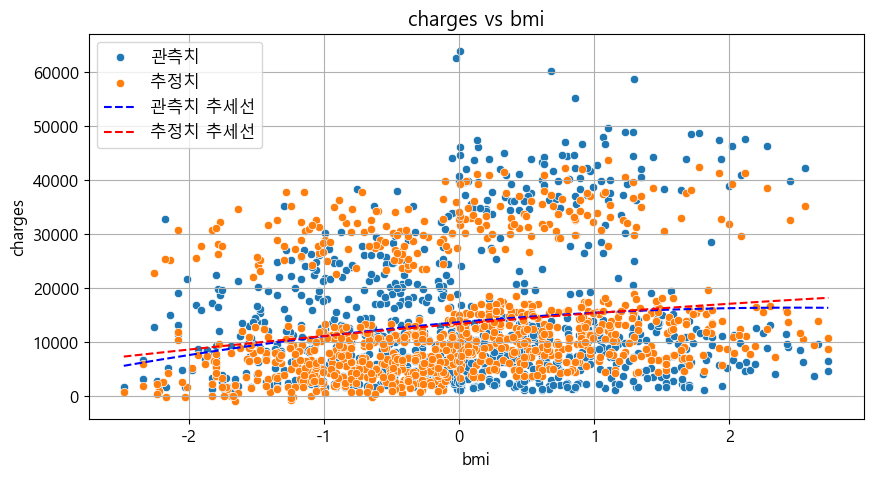

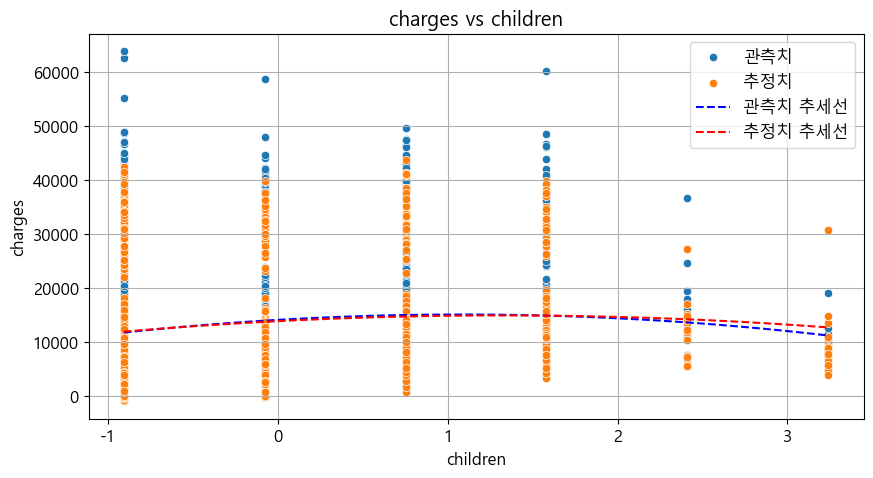

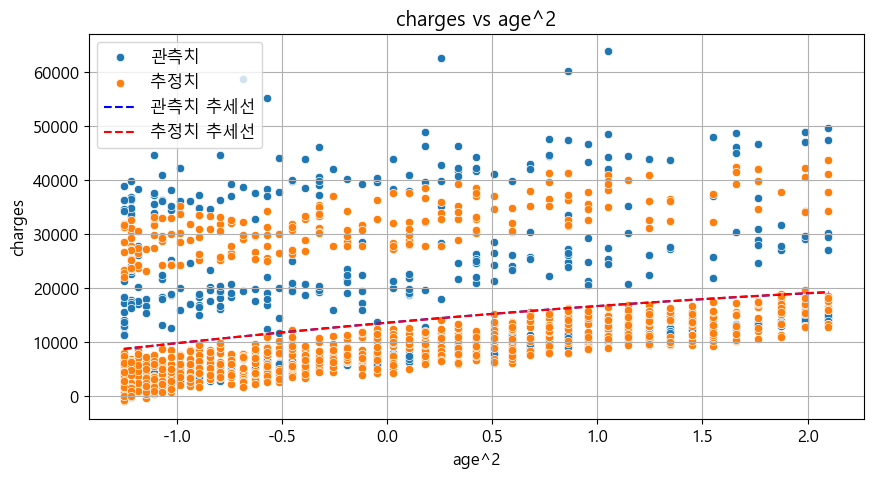

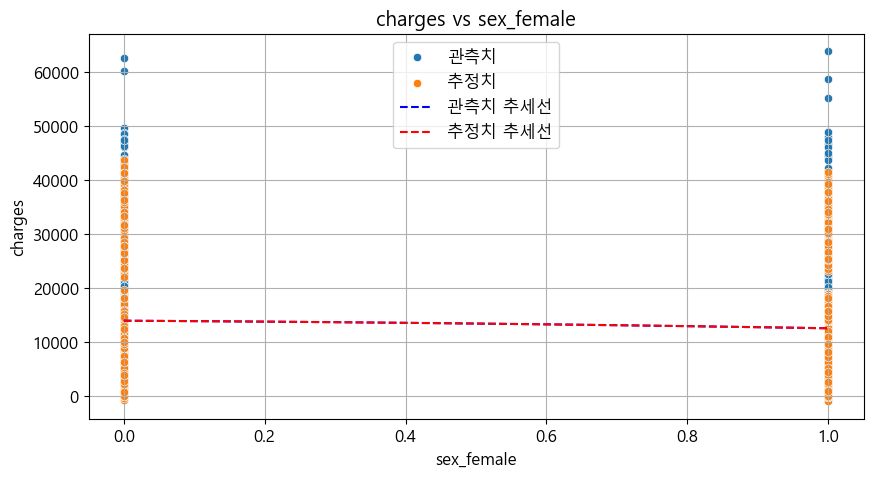

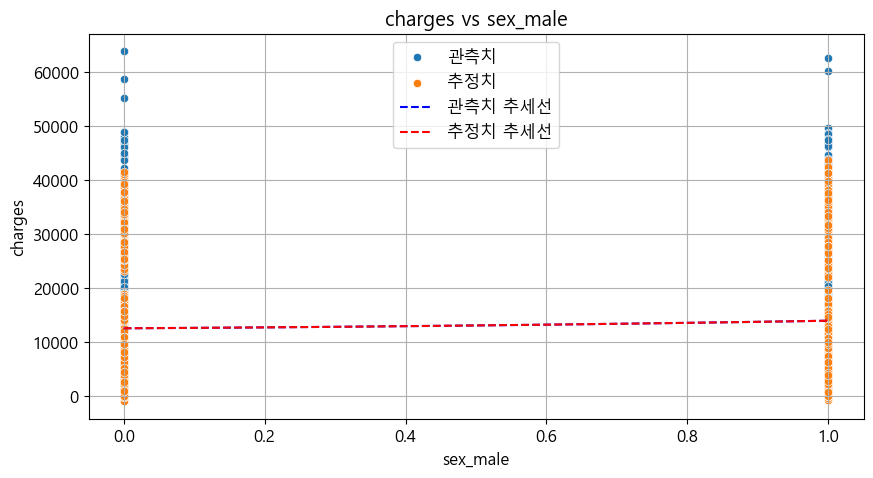

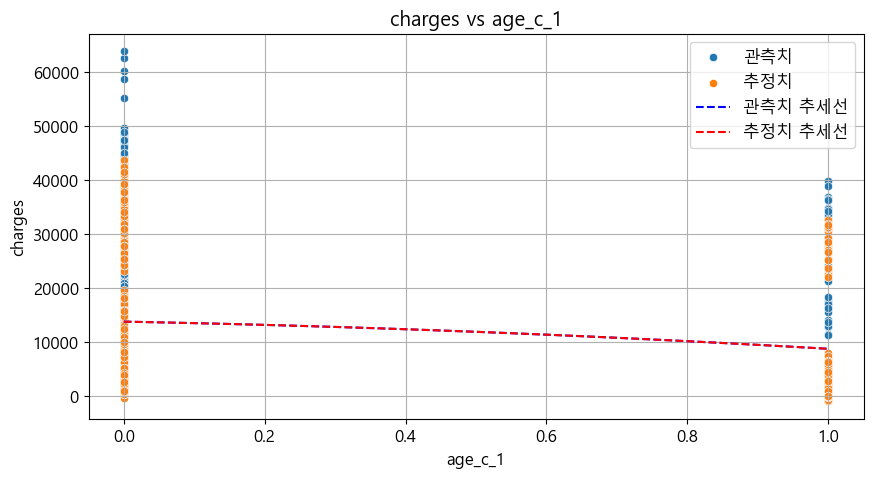

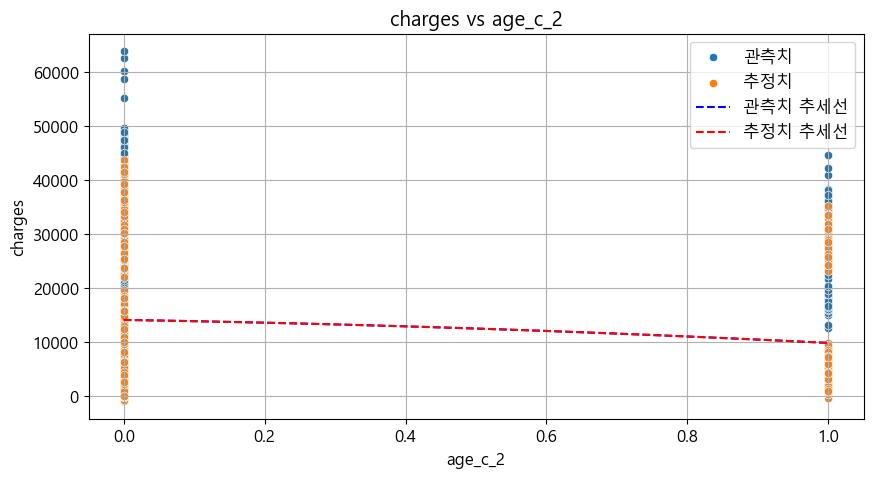

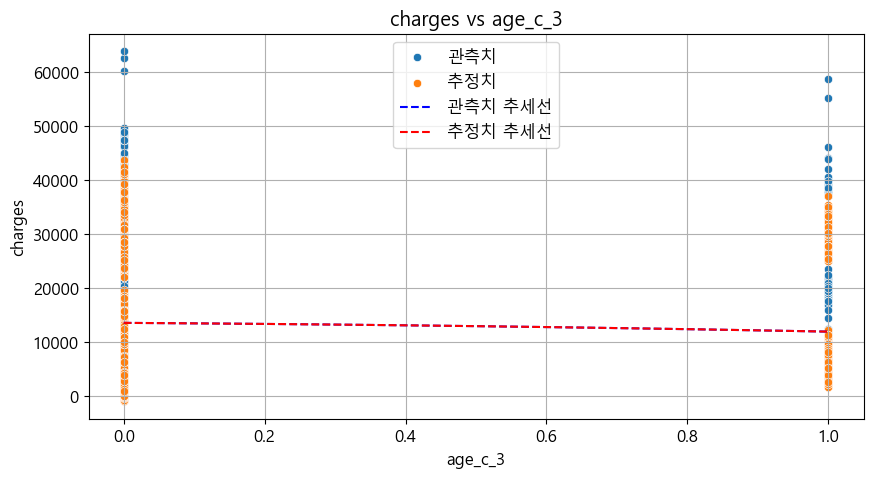

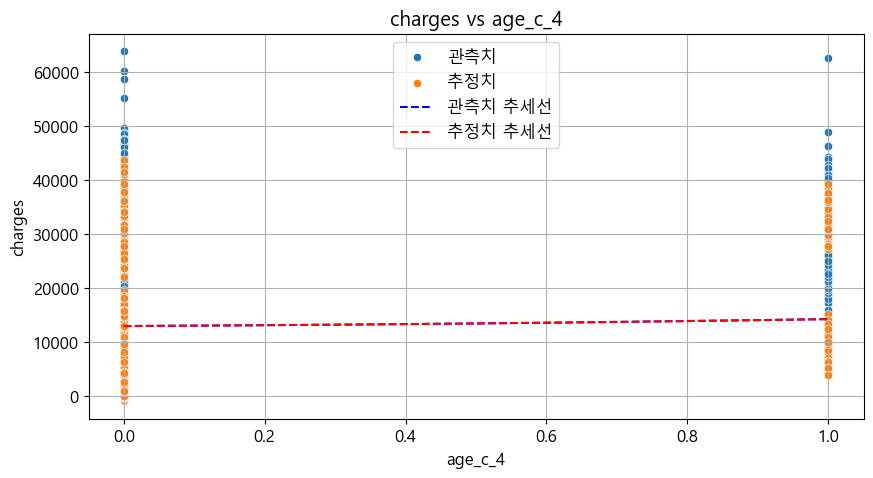

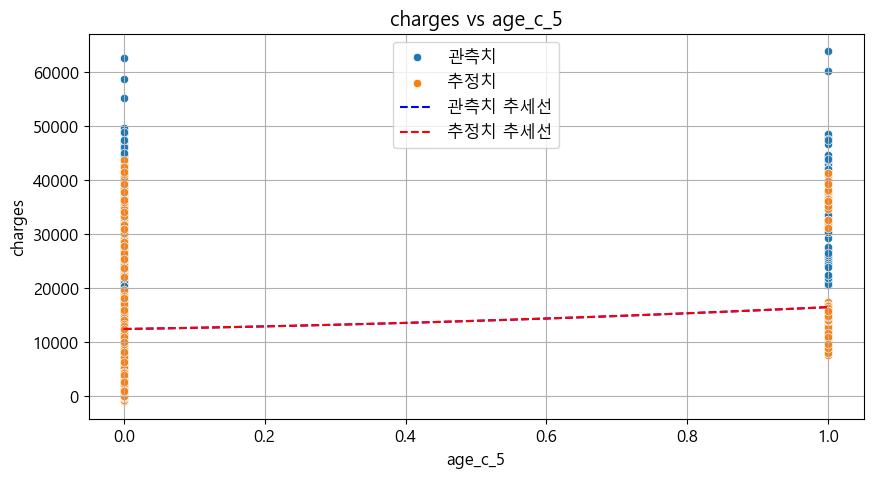

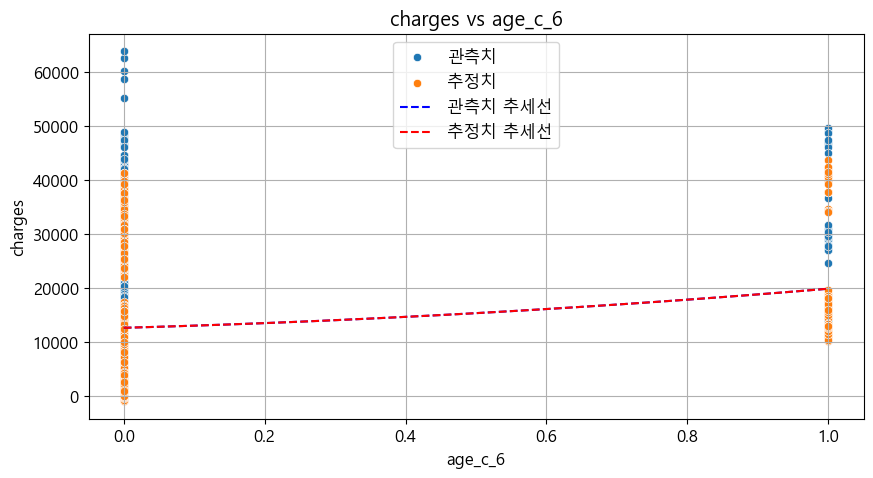

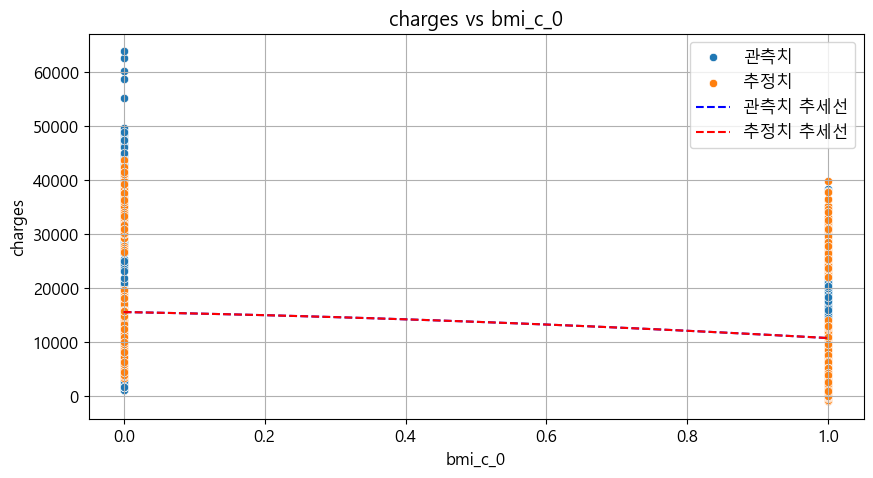

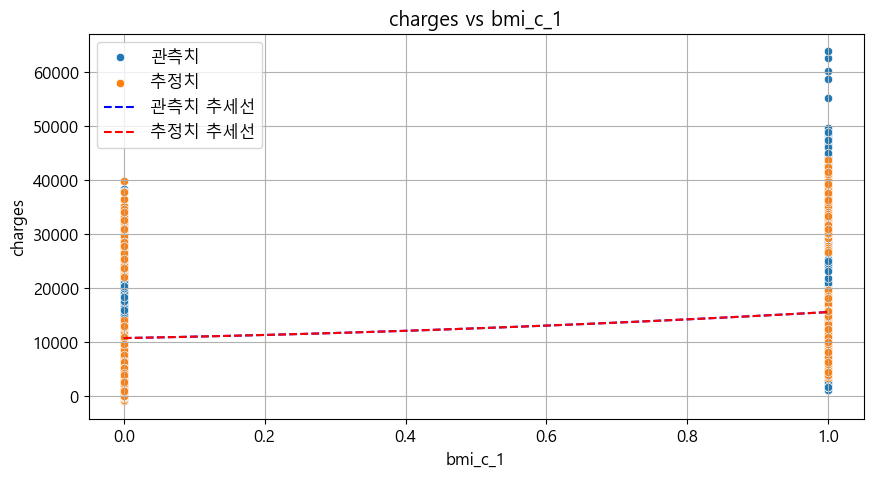

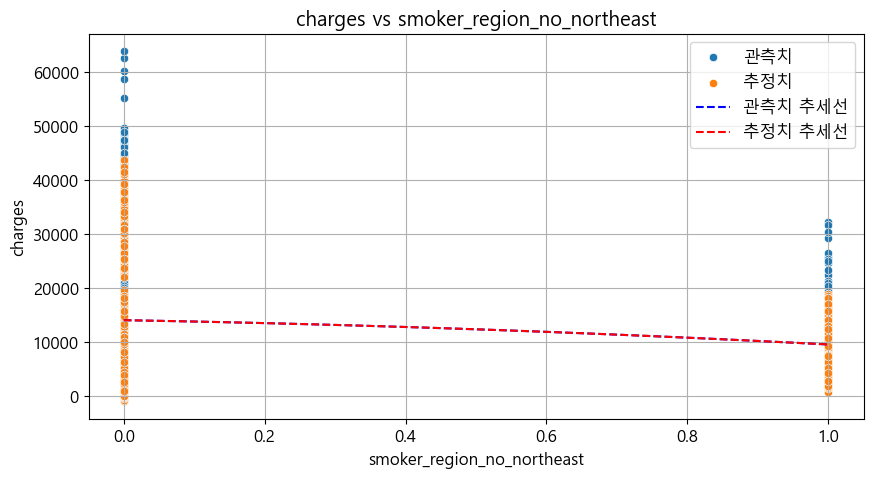

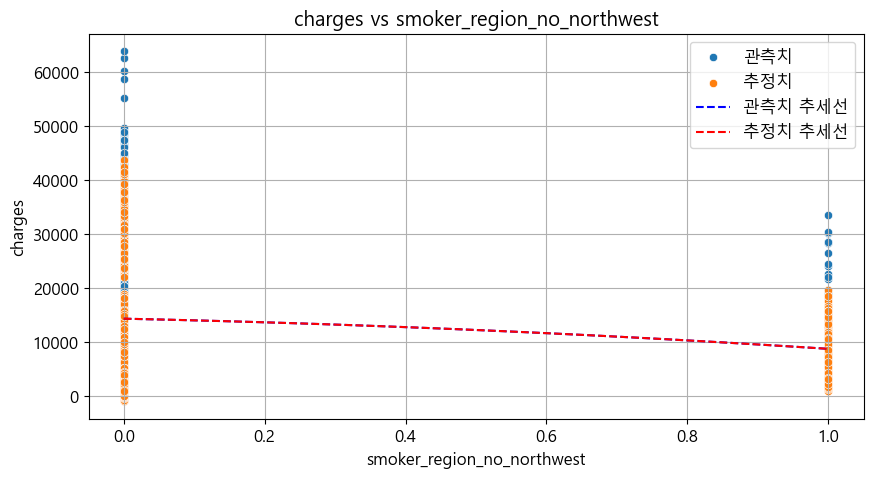

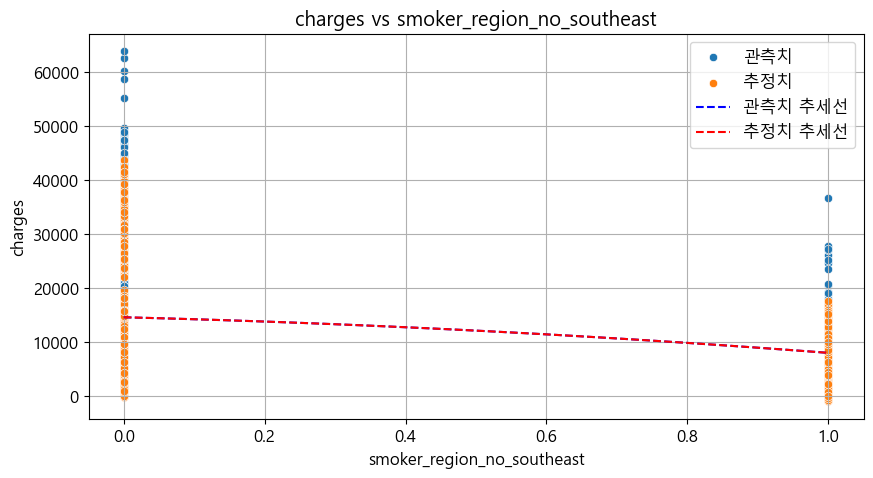

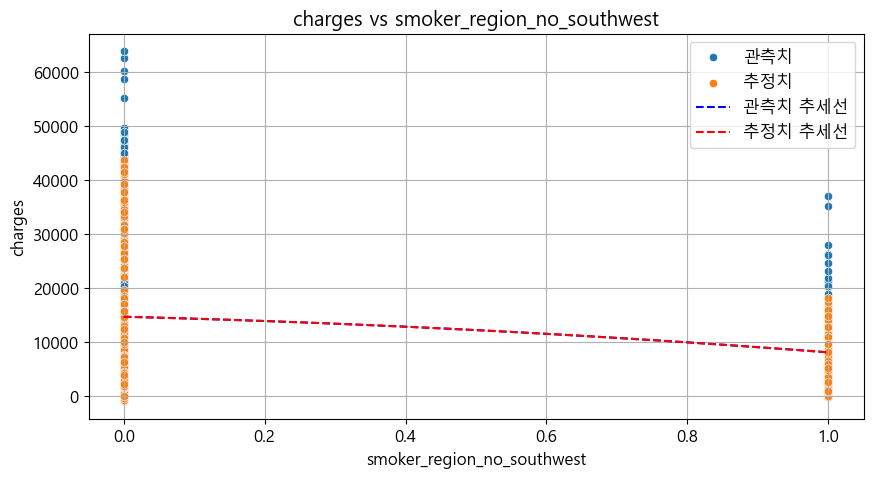

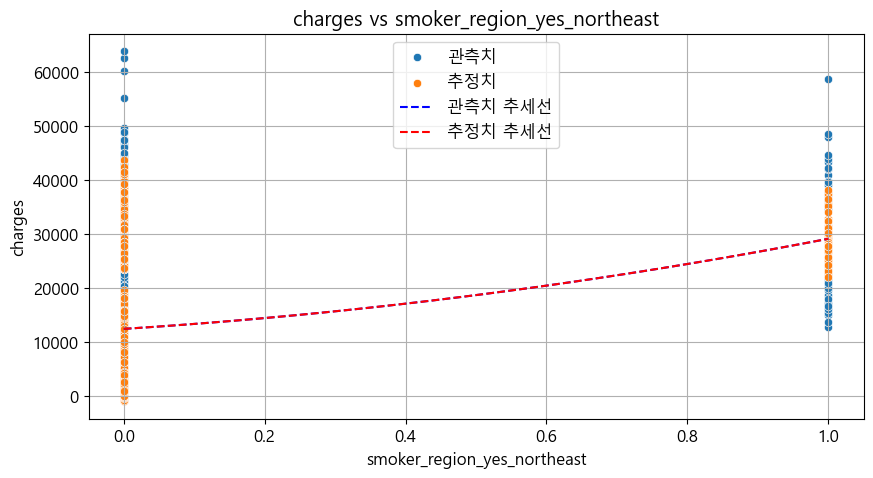

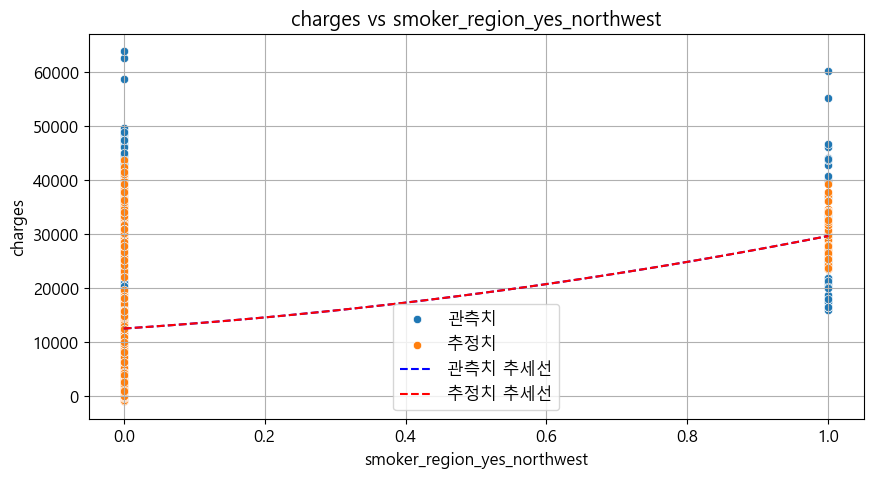

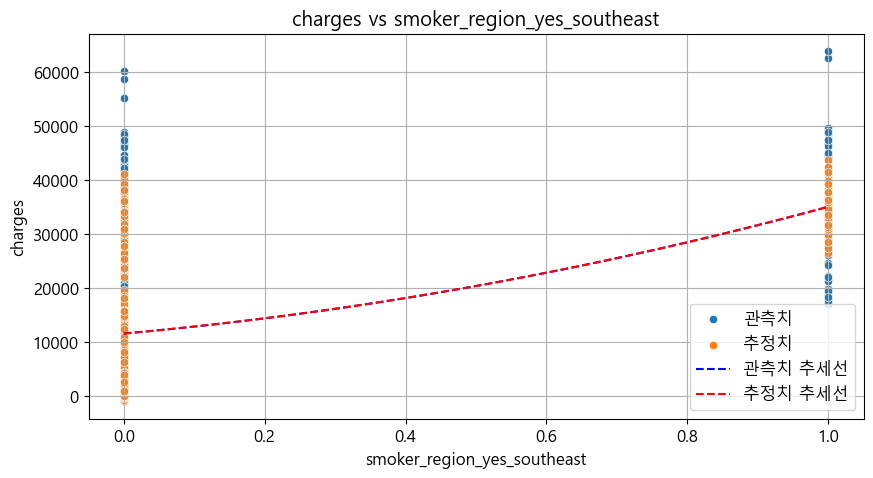

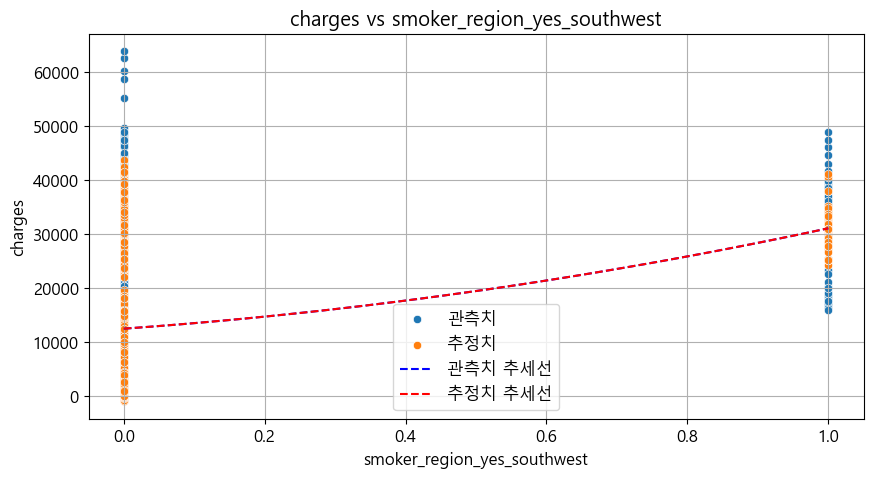

LinearRegression(n_jobs=-1)

In [66]:
my_linear_regression(x_train_4, y_train_4, dpi = 100, degree = 2)

- flask 패키지
  - Flask, request 요청
- 이하 py 원본파일에서 실행

In [68]:
from flask import Flask, request

In [69]:
app = Flask(__name__)

In [ ]:
@app.route("/hello/world", methods = ['GET'])
def helloworld():
    # URL에 포함된 변수 추출
    # ?age=40&children=1&smoke=Y/N&ob==Y/N
    age = request.args.get('age')
    children = request.args.get('children')
    smoke = request.args.get('smoke')
    ob = request.args.get('ob')

    # 원하는 형태로 변환
    p_age = int(age) ** 2
    p_children = int(children)
    p_smoke = 1 if smoke == "Y" else 0
    p_ob = 1 if ob == "Y" else 0

    # 변환된 내용을 활용하여 예측값 얻기
    y = fit.predict([[[p_age, p_children, p_smoke, p_ob]]])
    return {"y" : y}

if __name__ == "__main__":
    app.run(host = '127.0.0.1', port = 3001, debug = True)

In [1]:
from sklearn.datasets import make_regression

In [28]:
A, B = make_regression(n_samples = 100, n_features = 3, n_targets = 1)

In [29]:
columns = ["x%d" % (i+1) for i in range(A.shape[1])]

In [30]:
df_A = pd.DataFrame(A, columns = columns)
df1 = pd.concat([df_A, pd.Series(B, name = 'target')], axis = 1)

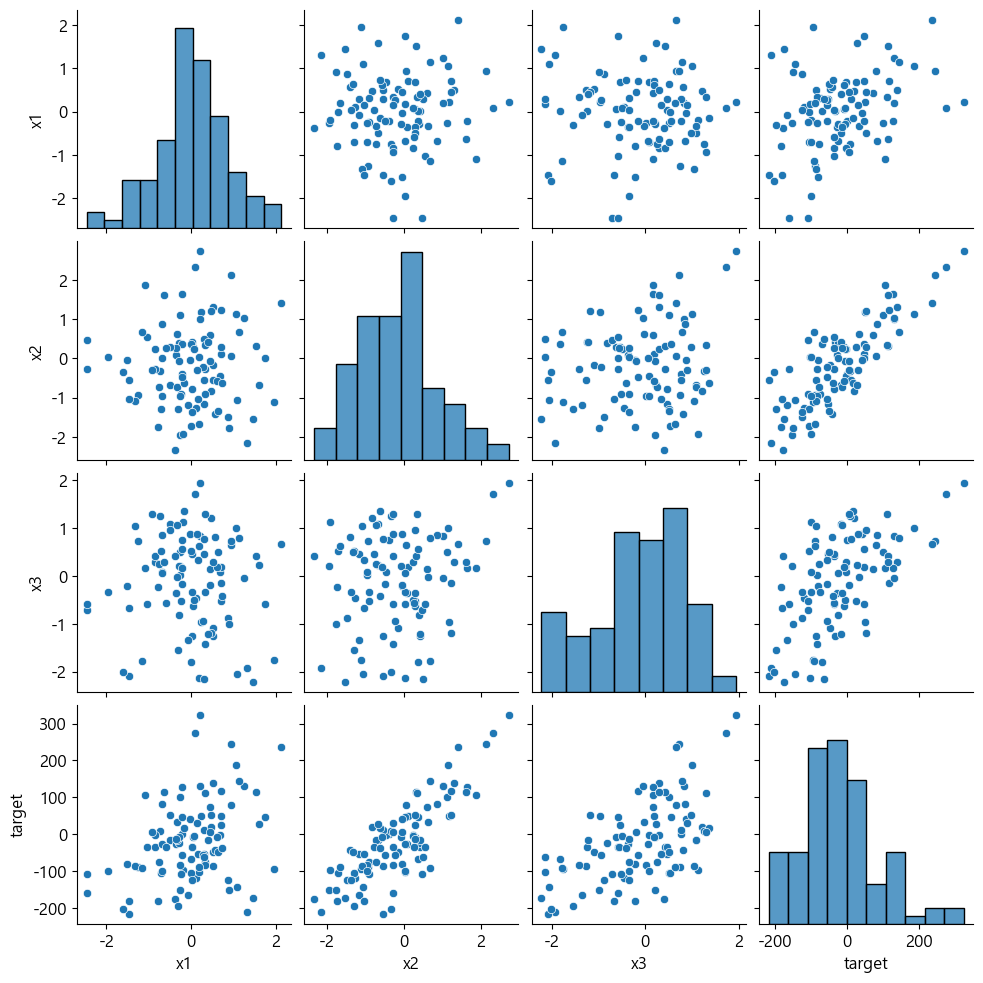

In [31]:
my_pairplot(df1, dpi = 100)

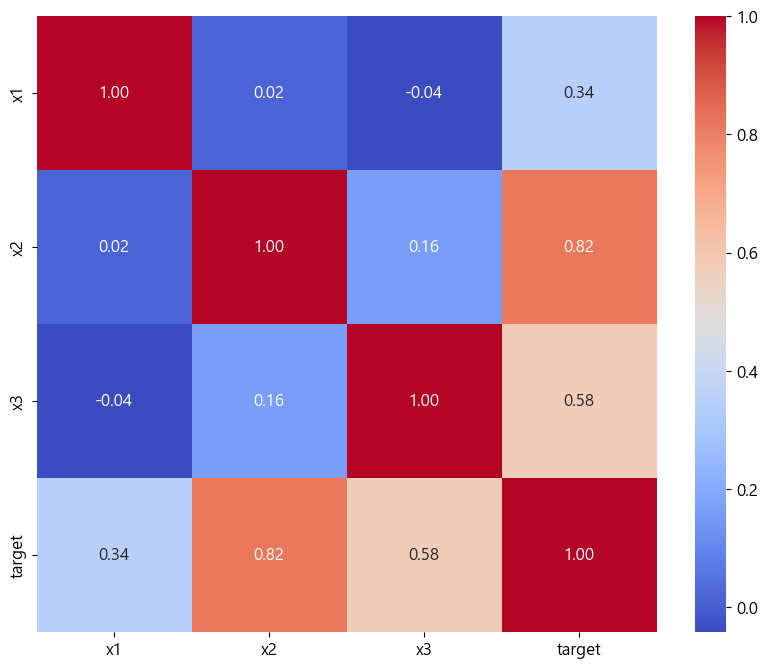

+------------------+---------------+-------------+----------+
|                  |   correlation |     p-value | result   |
|------------------+---------------+-------------+----------|
| ('x1', 'x2')     |     0.0180358 |    0.858641 | False    |
| ('x1', 'x3')     |     -0.042359 |    0.675617 | False    |
| ('x1', 'target') |      0.344902 | 0.000441199 | True     |
| ('x2', 'x1')     |     0.0180358 |    0.858641 | False    |
| ('x2', 'x3')     |      0.162475 |    0.106294 | False    |
| ('x2', 'target') |      0.819719 | 1.86714e-25 | True     |
| ('x3', 'x1')     |     -0.042359 |    0.675617 | False    |
| ('x3', 'x2')     |      0.162475 |    0.106294 | False    |
| ('x3', 'target') |      0.579548 | 2.65553e-10 | True     |
| ('target', 'x1') |      0.344902 | 0.000441199 | True     |
| ('target', 'x2') |      0.819719 | 1.86714e-25 | True     |
| ('target', 'x3') |      0.579548 | 2.65553e-10 | True     |
+------------------+---------------+-------------+----------+


In [32]:
my_correlation(df1, dpi = 100)

In [35]:
x_train, x_test, y_train, y_test = my_train_test_split(df1, yname = 'target', test_size = 0.3, random_state = 0)

[회귀식]
target = 43.548 * x1 + 77.689 * x2 + 52.837 * x3 + 0.000

[회귀분석 성능평가]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 데이터 |              1 |         2.81748e-14 |         1.13533e-27 |      3.36946e-14 |                     1.55246e-12 |           1.49894e-12 |
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+


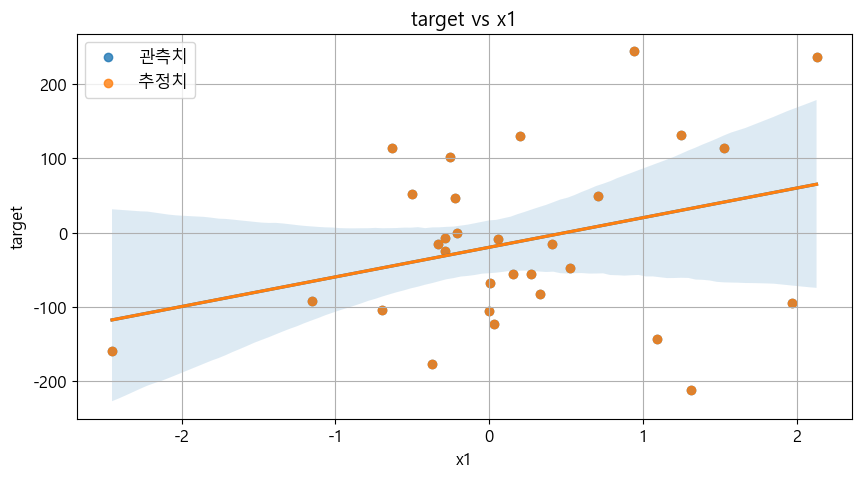

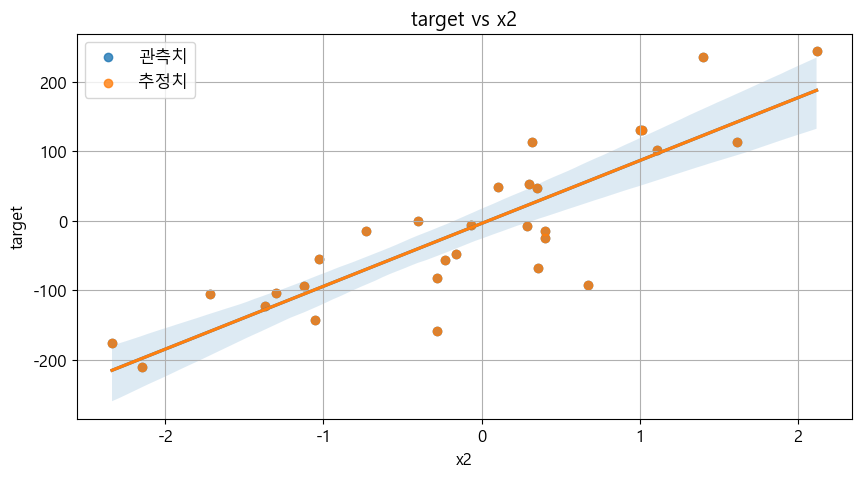

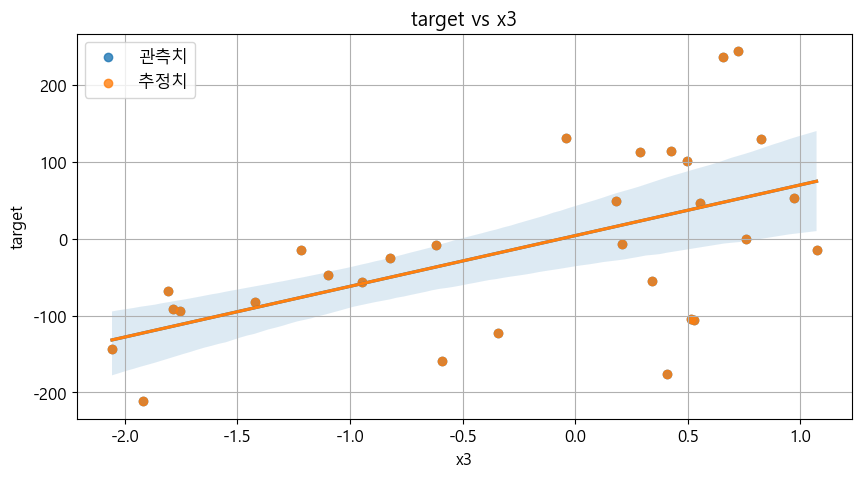

In [36]:
fit = my_linear_regression(x_train, y_train, x_test, y_test, dpi = 100, report = False)

In [39]:
my_linear_regression_report(fit, x_test, y_test)

[선형회귀분석 결과보고]
+----+------------+------------+--------------------+------------+------------------+-------------+------------+---------+
|    | 종속변수   | 독립변수   |   B(비표준화 계수) |   표준오차 |   β(표준화 계수) |           t |   유의확률 |     VIF |
|----+------------+------------+--------------------+------------+------------------+-------------+------------+---------|
|  0 | target     | x1         |            43.5477 |          0 |            0.353 | 5.96717e+15 |          0 | 1.04317 |
|  1 | target     | x2         |            77.6887 |          0 |            0.733 | 1.22171e+16 |          0 | 1.06743 |
|  2 | target     | x3         |            52.8374 |          0 |            0.456 | 7.52394e+15 |          0 | 1.10515 |
+----+------------+------------+--------------------+------------+------------------+-------------+------------+---------+

𝑅^2(1.000), Adj.𝑅^2(1.000), F(inf), P-value(0), Durbin-Watson(2.560)

target에 대하여 x1,x2,x3로 예측하는 회귀분석을 실시한 결과,
이 회귀모형은 통계적으로 유의하다(F(3,26) = inf, p <= 0

In [62]:
df2 = pd.read_excel("./data/diabetes.xlsx")
df2.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646     151  
1 -0.039493 -0.068332 -0.092204      75  
2 -0.002592  0.002861 -0.025930     141  
3  0.034309  0.022688 -0.009362     206  
4 -0.002592 -0.031988 -0.046641     135

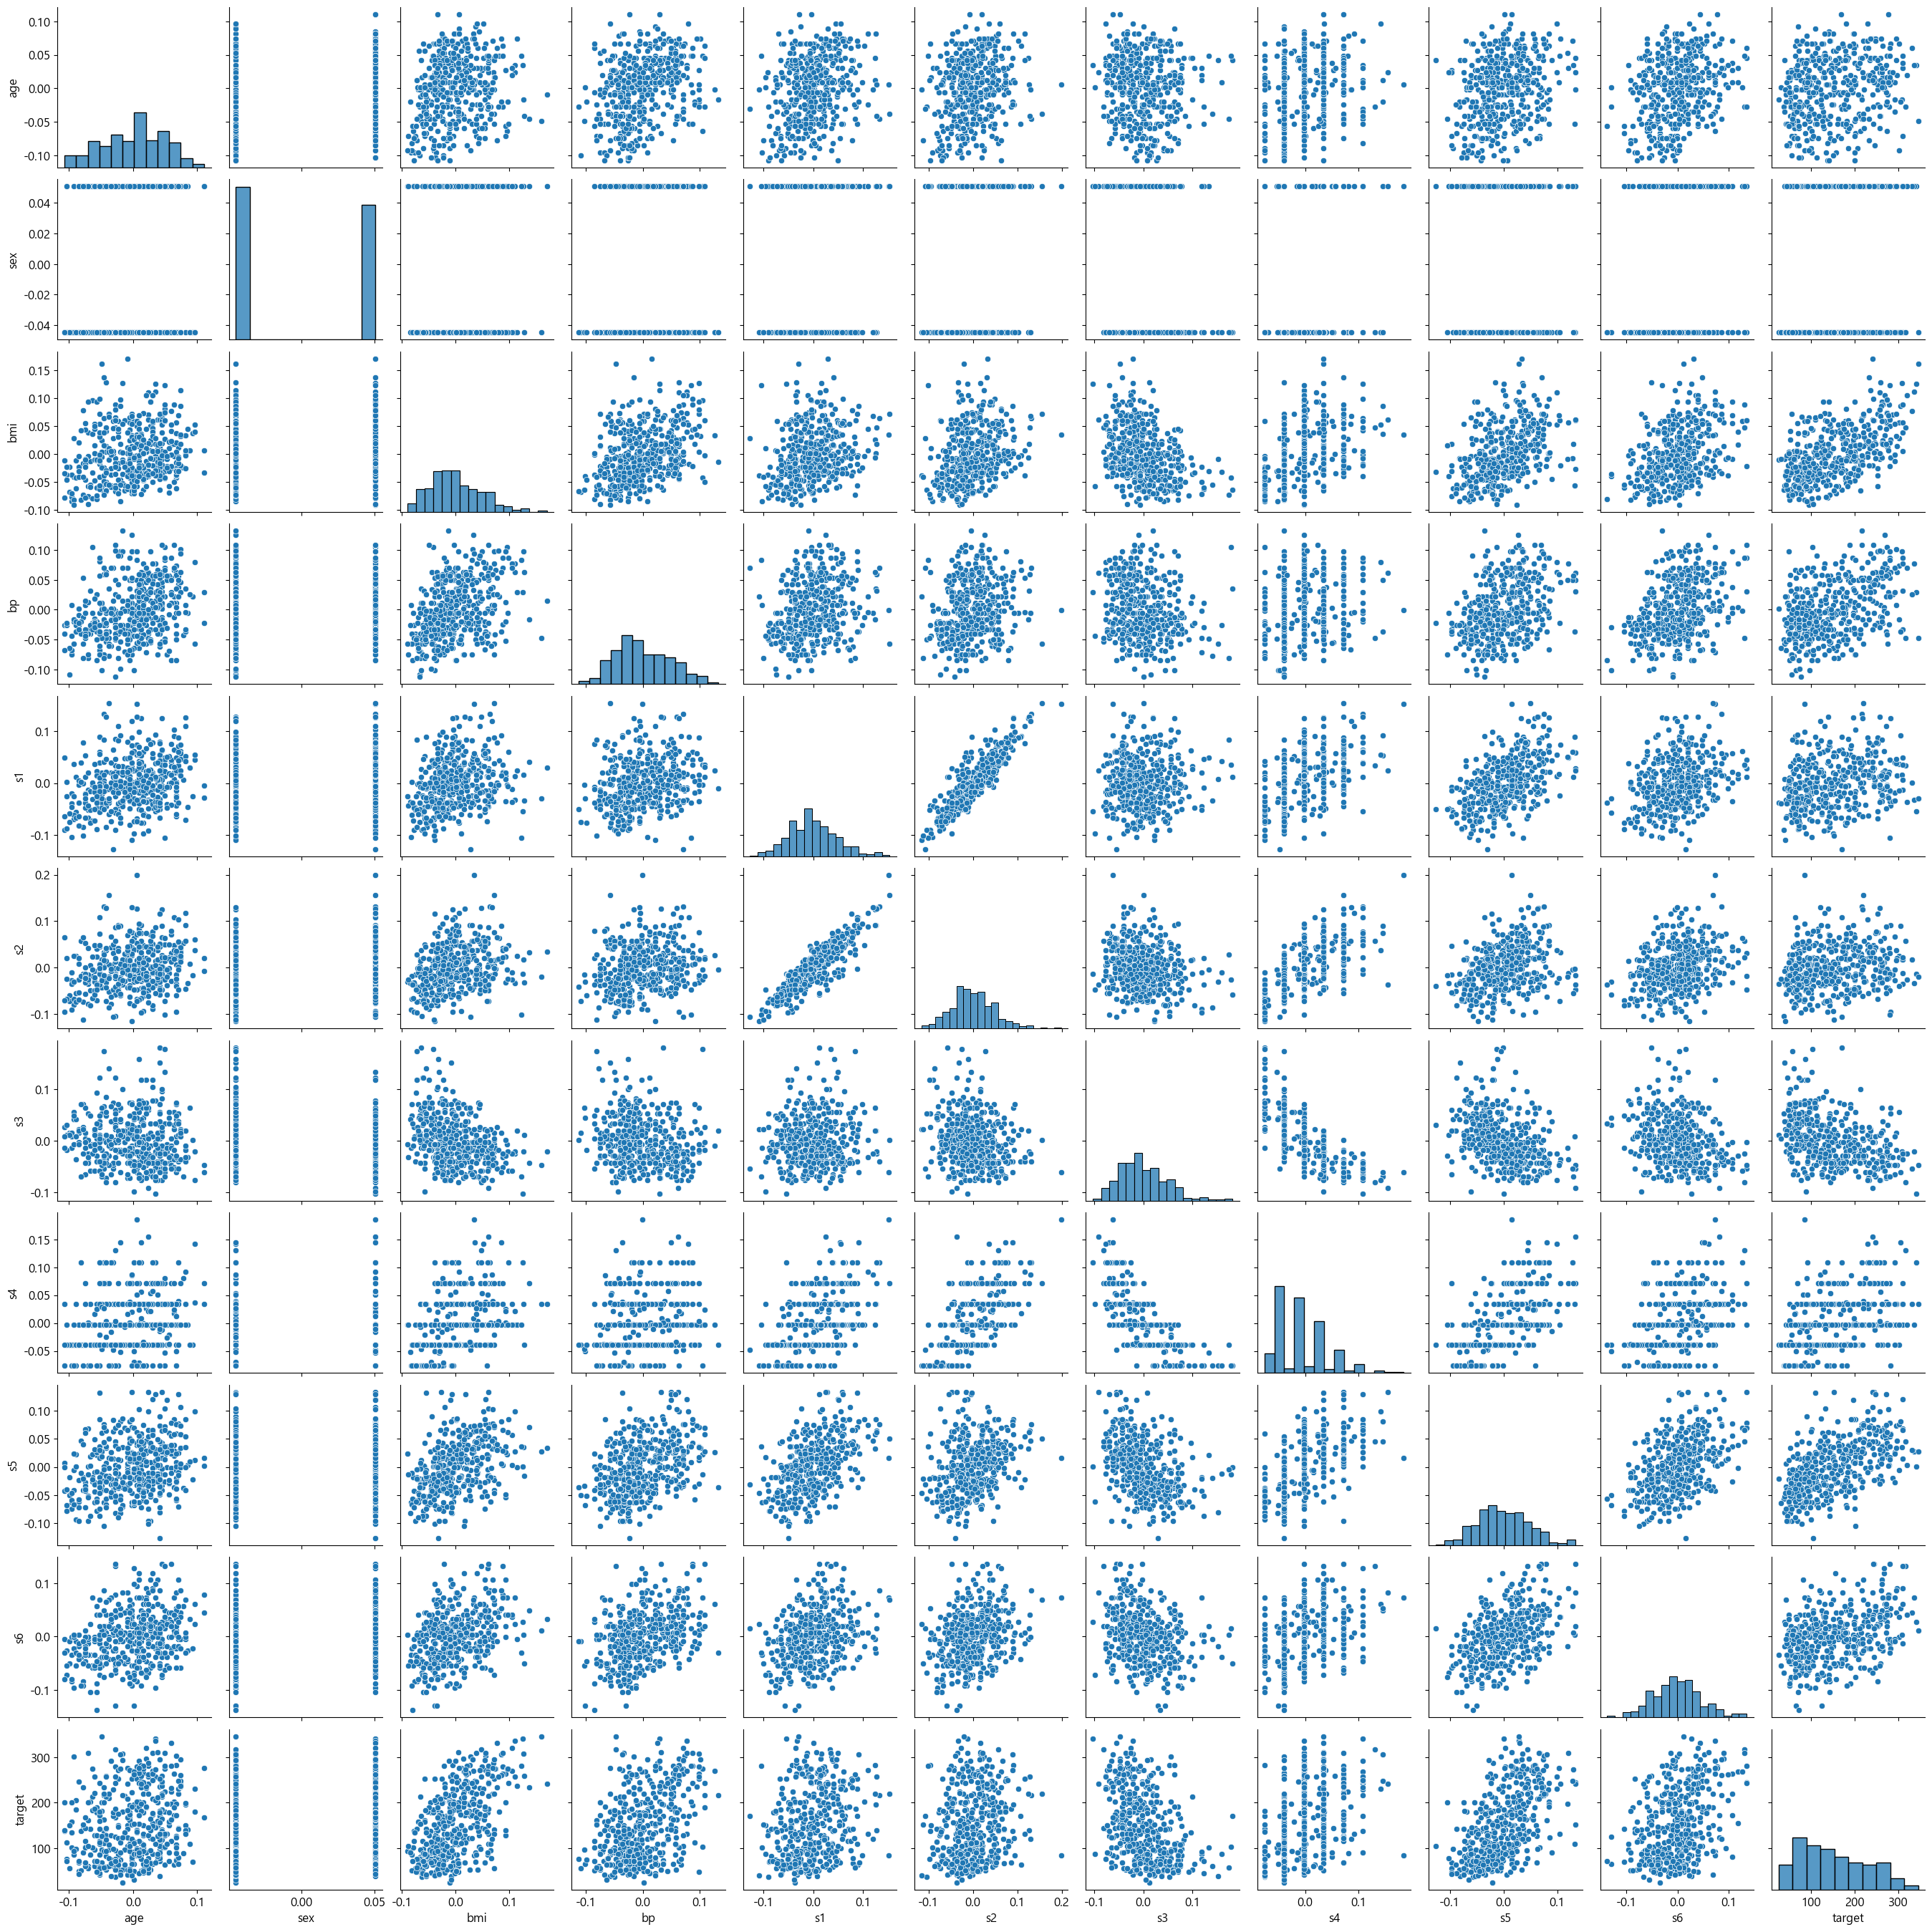

In [65]:
my_pairplot(df2, dpi = 100)

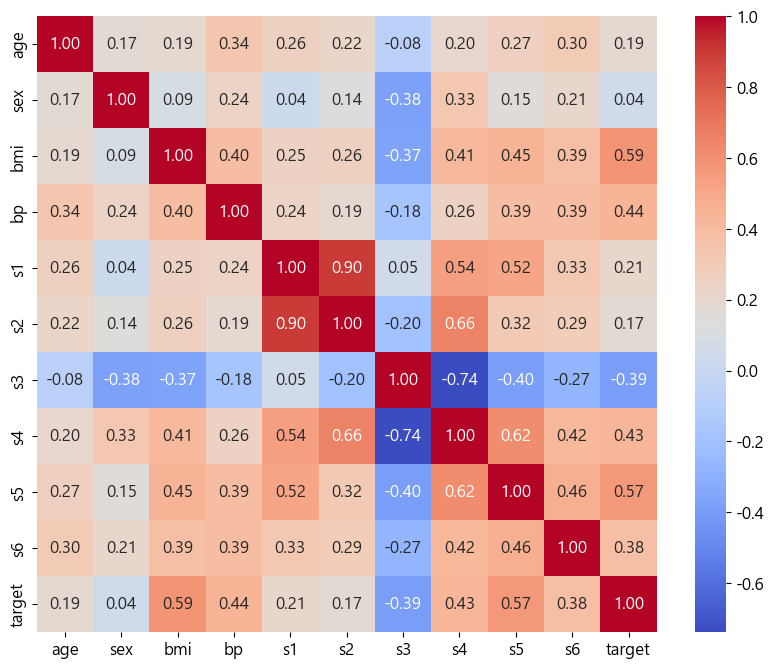

+-------------------+---------------+--------------+----------+
|                   |   correlation |      p-value | result   |
|-------------------+---------------+--------------+----------|
| ('age', 'sex')    |      0.173737 |  0.000242343 | True     |
| ('age', 'bmi')    |      0.185085 |  9.07679e-05 | True     |
| ('age', 'bp')     |      0.335428 |  4.39257e-13 | True     |
| ('age', 's1')     |      0.260061 |  2.89415e-08 | True     |
| ('age', 's2')     |      0.219243 |  3.27139e-06 | True     |
| ('age', 's3')     |     -0.075181 |     0.114486 | False    |
| ('age', 's4')     |      0.203841 |  1.56879e-05 | True     |
| ('age', 's5')     |      0.270774 |  7.25119e-09 | True     |
| ('age', 's6')     |      0.301731 |  9.34796e-11 | True     |
| ('age', 'target') |      0.187889 |  7.05569e-05 | True     |
| ('sex', 'age')    |      0.173737 |  0.000242343 | True     |
| ('sex', 'bmi')    |     0.0881614 |     0.064048 | False    |
| ('sex', 'bp')     |       0.24101 |  2

In [67]:
my_correlation(df2, dpi = 100)

In [68]:
x_train, x_test, y_train, y_test = my_train_test_split(df2, 'target', test_size = 0.2)

In [70]:
my_linear_regression(x_train, y_train, x_test, y_test, use_plot = False)

[회귀식]
target = -6.185 * age + -225.232 * sex + 505.201 * bmi + 295.611 * bp + -826.051 * s1 + 466.910 * s2 + 130.746 * s3 + 252.955 * s4 + 691.083 * s5 + 111.208 * s6 + 152.048

[회귀분석 성능평가]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 데이터 |        0.56759 |             42.8761 |             2724.26 |          52.1944 |                         37.6125 |              -18.1029 |
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+

[선형회귀분석 결과보고]
+----+------------+------------+--------------------+------------+------------------+----

LinearRegression(n_jobs=-1)

In [74]:
ignore = ['s1']
x_train2 = x_train.drop(ignore, axis = 1)
x_test2 = x_test.drop(ignore, axis = 1)
my_linear_regression(x_train2, y_train, x_test2, y_test, use_plot = False)

[회귀식]
target = -1.514 * age + -216.652 * sex + 515.366 * bmi + 287.519 * bp + -179.828 * s2 + -230.392 * s3 + 144.236 * s4 + 389.957 * s5 + 112.097 * s6 + 152.033

[회귀분석 성능평가]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 데이터 |       0.566203 |             42.9032 |             2732.99 |           52.278 |                          37.701 |              -18.4778 |
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+

[선형회귀분석 결과보고]
+----+------------+------------+--------------------+------------+------------------+--------+---------

LinearRegression(n_jobs=-1)

In [90]:
ignore = ['s1', 'age', 's4', 's6', 's2', 'sex', 's3']
x_train3 = x_train.drop(ignore, axis = 1)
x_test3 = x_test.drop(ignore, axis = 1)
my_linear_regression(x_train3, y_train, x_test3, y_test, use_plot = False)

[회귀식]
target = 597.427 * bmi + 256.965 * bp + 513.953 * s5 + 152.504

[회귀분석 성능평가]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 데이터 |        0.55443 |             43.9484 |             2807.17 |          52.9827 |                         40.4127 |              -21.2421 |
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+

[선형회귀분석 결과보고]
+----+------------+------------+--------------------+------------+------------------+-------+------------+---------+
|    | 종속변수   | 독립변수   |   B(비표준화 계수) |   표준오차 |   β(표준화 계수) |     t |   유의확률 | 

LinearRegression(n_jobs=-1)

In [91]:
df2

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0   -0.002592  0.019907 -0.017646     151  
1   -0.039493 -0.068332 -0.092204      75  
2   -0.002592  0.002861 -0.025930     141  
3    0.034309  0.022688 -0.009362     206  
4   -0.002592 -0.031988 -0.046641     135  
..        ...       ...       ...     ...  
437 -0.002592  0.031193  0.007207     178  
438  0.034309 -0.018114  0.044485     104  
439 -0.011080 -0.046883  0.015491     132  
440  0.026560  0.044529 -0.025930     220  
441 -0.039493 -0.004222  0.003064      57  

[442 rows x 11 columns]

In [96]:
tmp = df2['sex'].unique()
dict_map = {tmp[0] : 1, tmp[1] : 0}

In [97]:
df2['sex_o'] = df2['sex'].map(dict_map)

In [99]:
df2.drop('sex', axis = 1, inplace = True)

In [103]:
x_train, x_test, y_train, y_test = my_train_test_split(df2, 'target', test_size = 0.2, random_state = 0)

In [113]:
ignore = ['s1', 'age', 's4', 's6', 's2', 's3', 'bp']
x_train2 = x_train.drop(ignore, axis = 1)
x_test2 = x_test.drop(ignore, axis = 1)
my_linear_regression(x_train2, y_train, x_test2, y_test, use_plot = False)

[회귀식]
target = 701.799 * bmi + 636.099 * s5 + -9.816 * sex_o + 156.858

[회귀분석 성능평가]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 데이터 |       0.279584 |             48.3178 |             3694.24 |          60.7802 |                         40.4482 |              -18.5335 |
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+

[선형회귀분석 결과보고]
+----+------------+------------+--------------------+------------+------------------+--------+------------+---------+
|    | 종속변수   | 독립변수   |   B(비표준화 계수) |   표준오차 |   β(표준화 계수) |      t |   유의확

LinearRegression(n_jobs=-1)